# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score

## Data Overview

- Observations
- Sanity checks

In [2]:
hotels = pd.read_csv("INNHotelsGroup.csv")

In [3]:
data = hotels.copy()

In [4]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [5]:
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

In [6]:
data.shape

(36275, 19)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**There are not any missing values in this dataset.**

In [8]:
data.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

In [9]:
data.describe(include=["object", "bool"])

Booking_ID type_of_meal_plan room_type_reserved market_segment_type  \
count       36275             36275              36275               36275   
unique      36275                 4                  7                   5   
top      INN01418       Meal Plan 1        Room_Type 1              Online   
freq            1             27835              28130               23214   

       booking_status  
count           36275  
unique              2  
top      Not_Canceled  
freq            24390

In [10]:
cat_columns = ["type_of_meal_plan", "room_type_reserved", "market_segment_type", "booking_status"]
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
**************************************************
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
**************************************************


In [11]:
data.repeated_guest.unique()

array([0, 1])

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [12]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

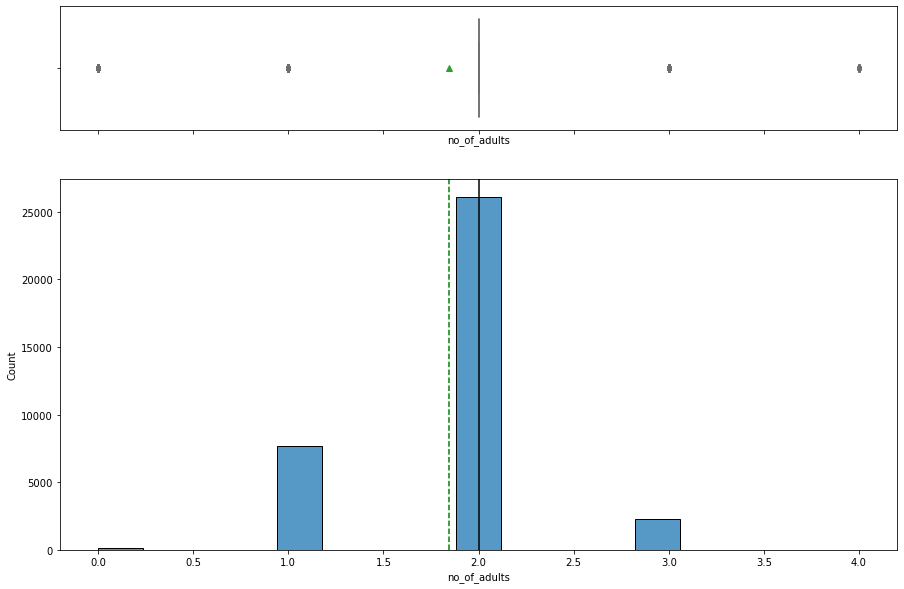

In [13]:
histogram_boxplot(data, "no_of_adults")

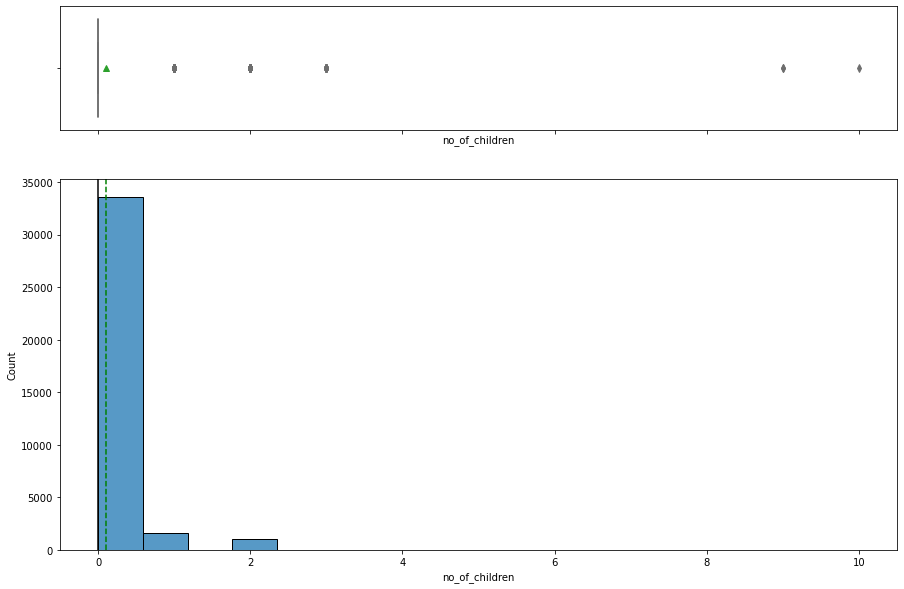

In [14]:
histogram_boxplot(data, "no_of_children")

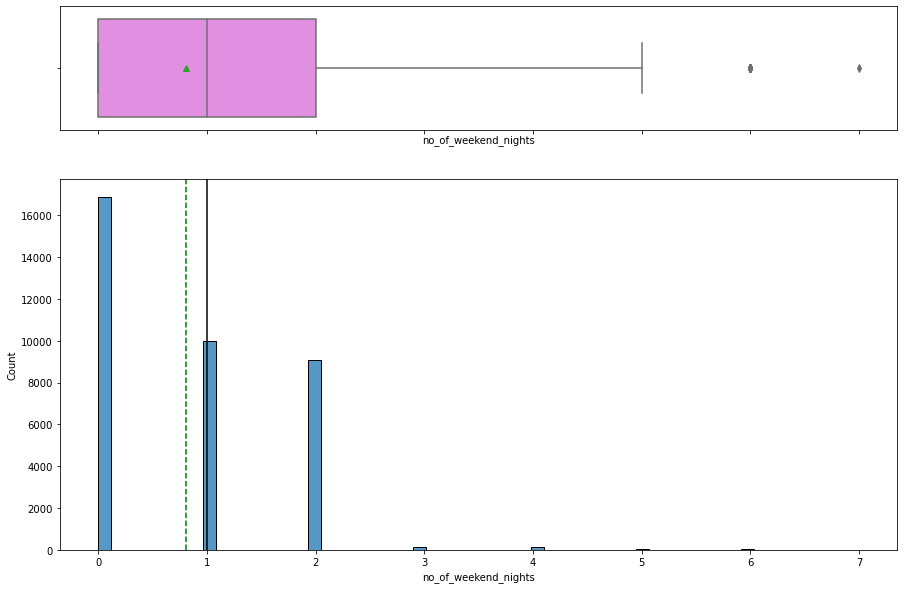

In [15]:
histogram_boxplot(data, "no_of_weekend_nights")

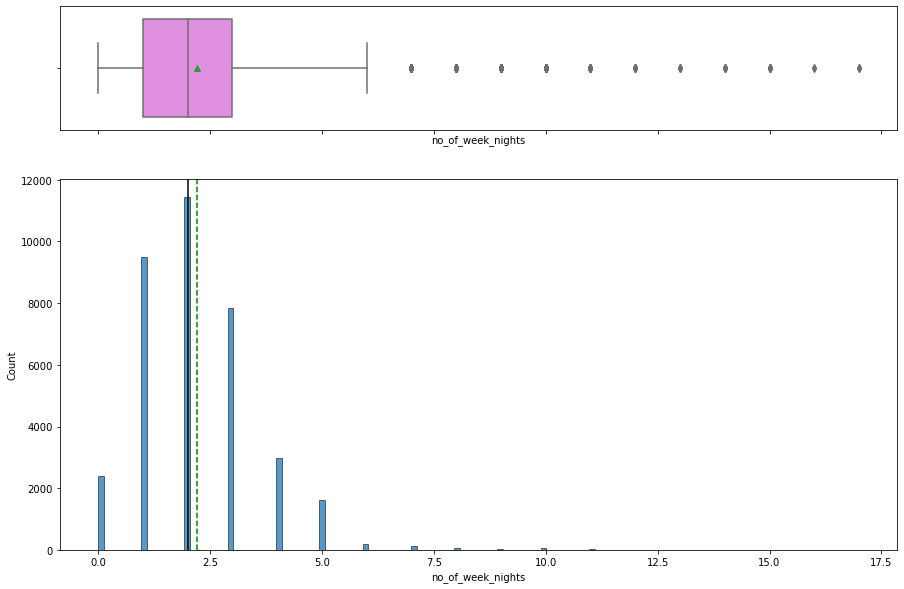

In [16]:
histogram_boxplot(data, "no_of_week_nights")

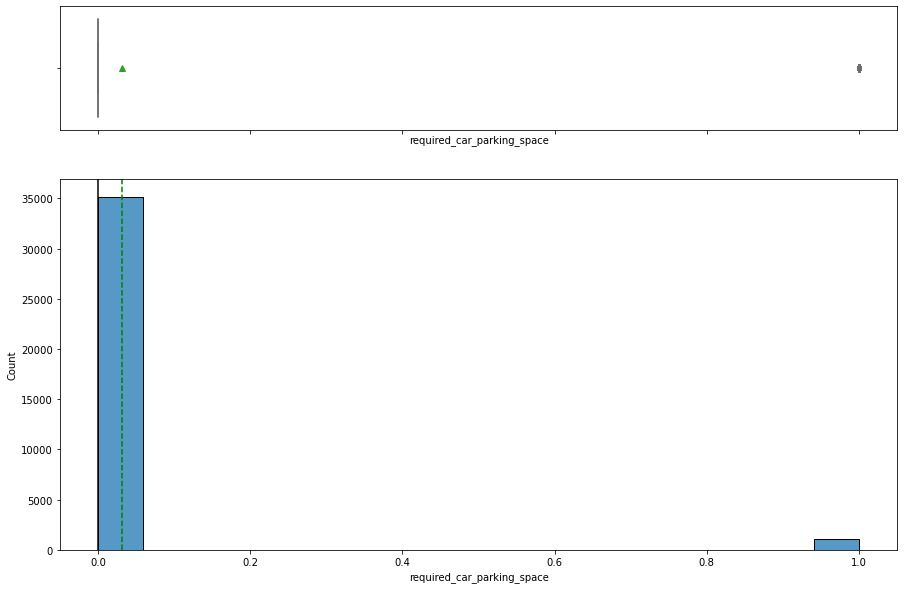

In [17]:
histogram_boxplot(data, "required_car_parking_space")

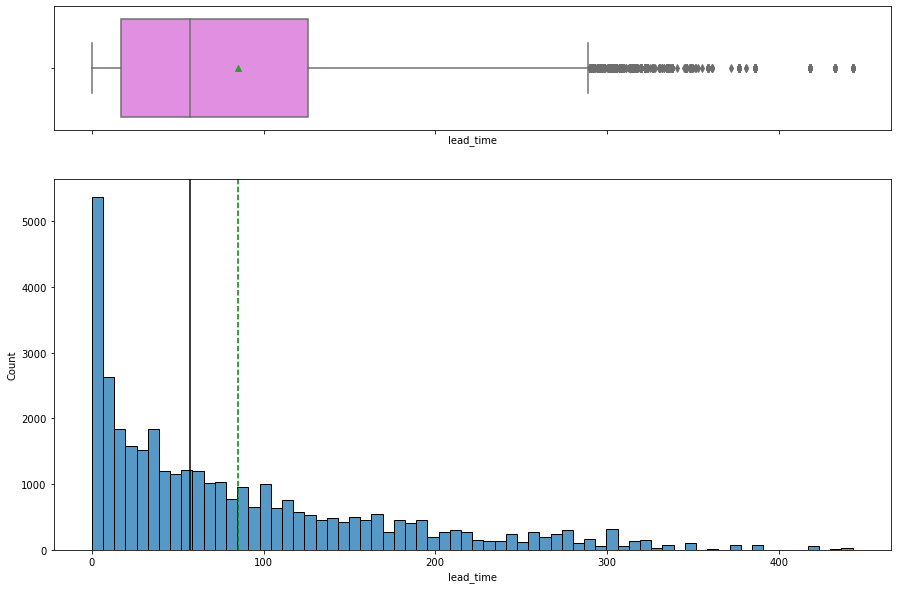

In [18]:
histogram_boxplot(data, "lead_time")

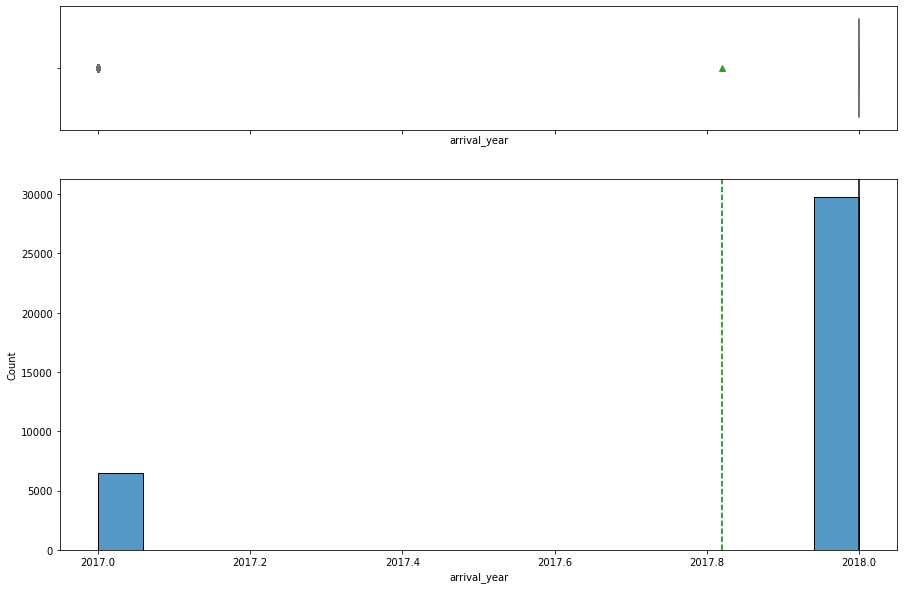

In [19]:
histogram_boxplot(data, "arrival_year")

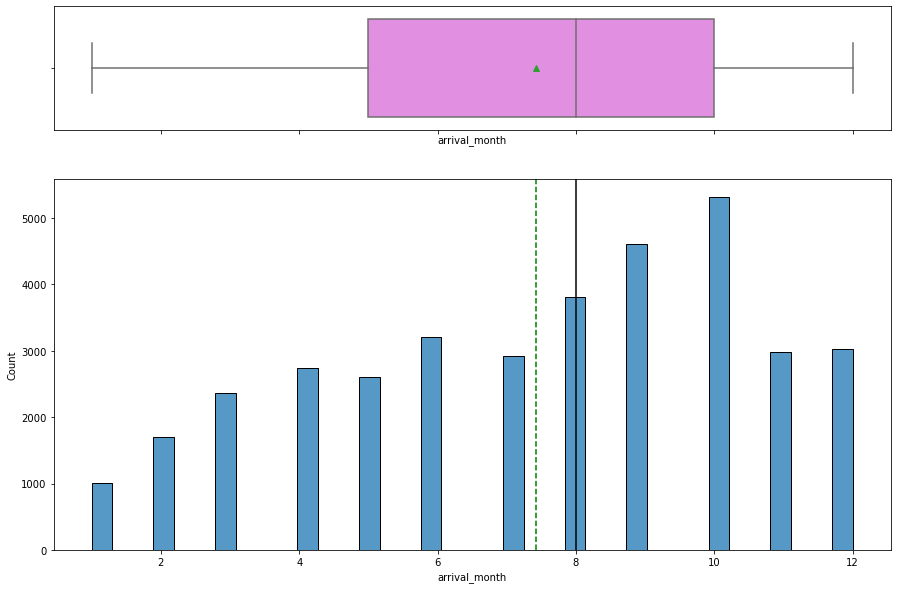

In [20]:
histogram_boxplot(data, "arrival_month")

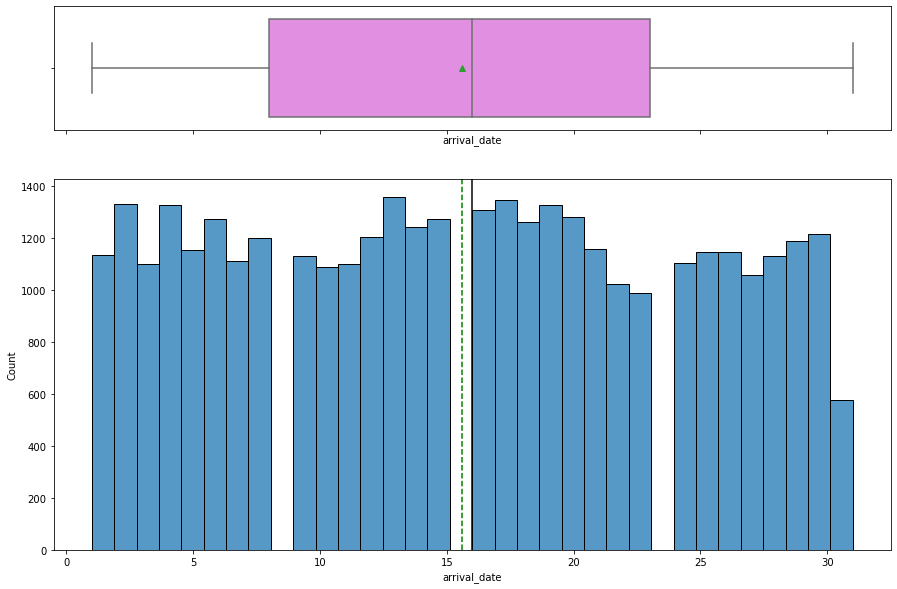

In [21]:
histogram_boxplot(data, "arrival_date")

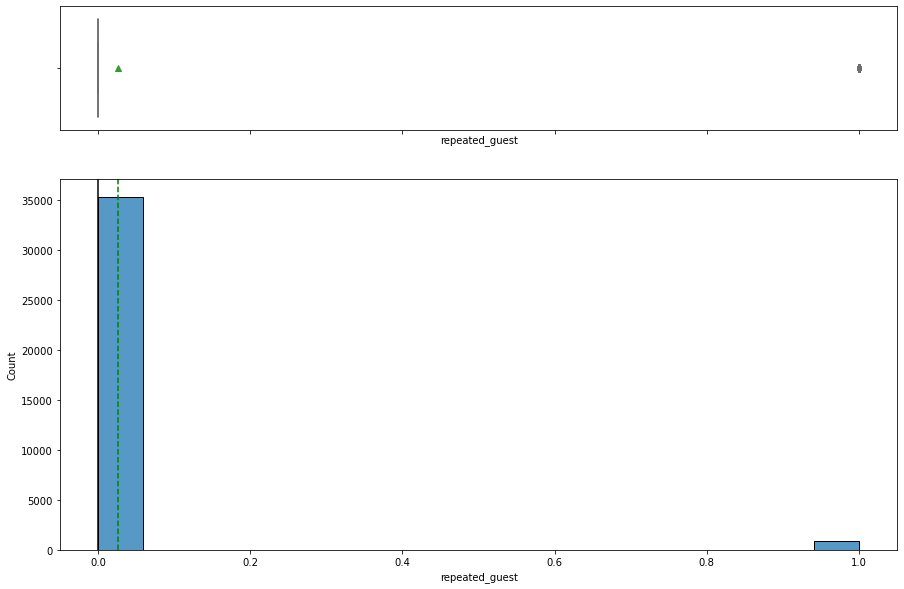

In [22]:
histogram_boxplot(data, "repeated_guest")

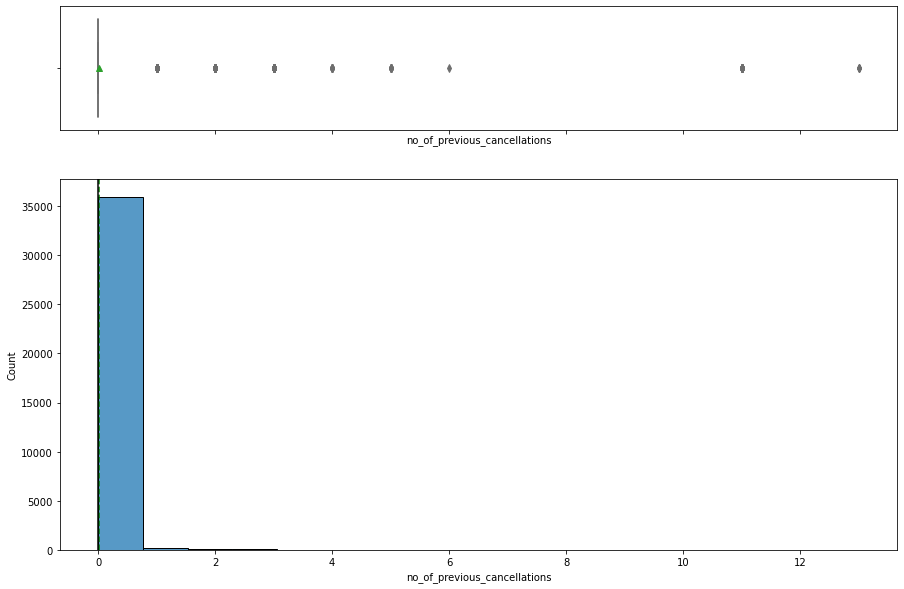

In [23]:
histogram_boxplot(data, "no_of_previous_cancellations")

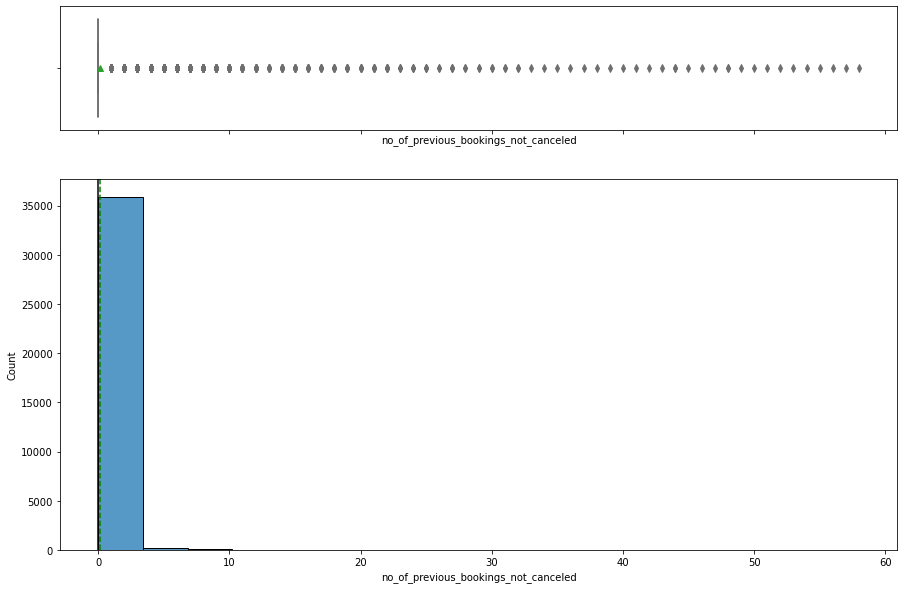

In [24]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

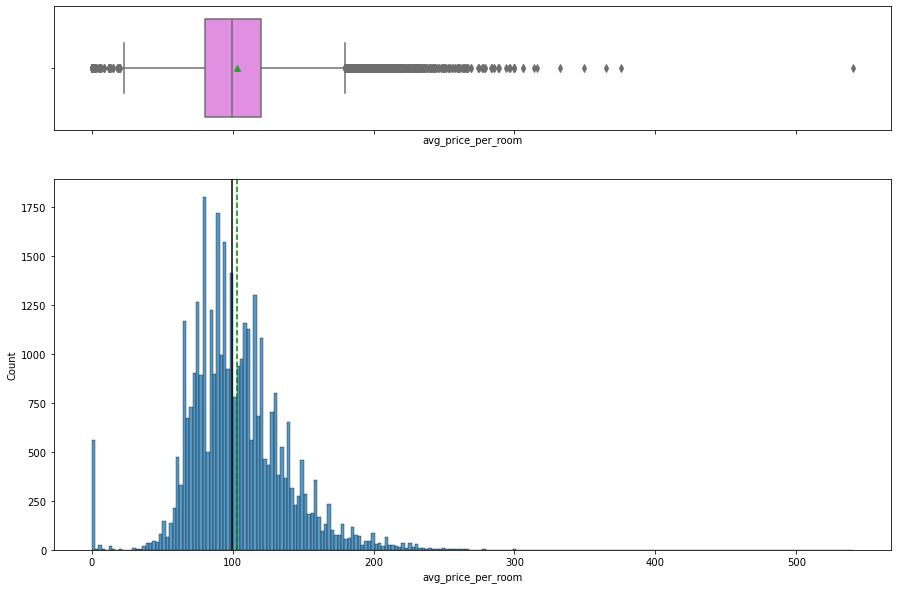

In [25]:
histogram_boxplot(data, "avg_price_per_room")

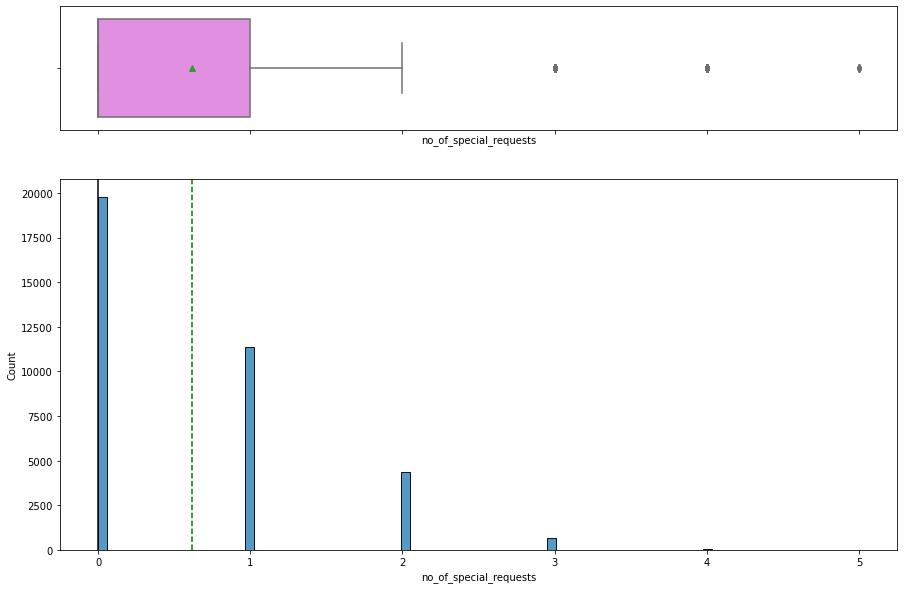

In [26]:
histogram_boxplot(data, "no_of_special_requests")

In [27]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

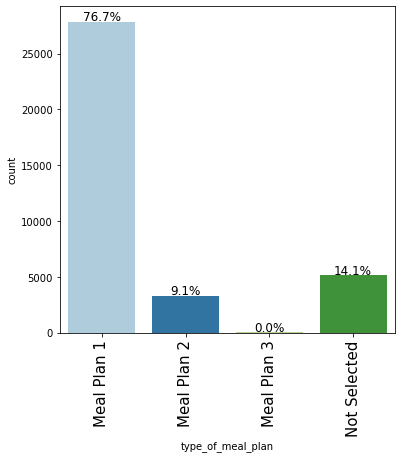

In [28]:
labeled_barplot(data, "type_of_meal_plan", perc=True)

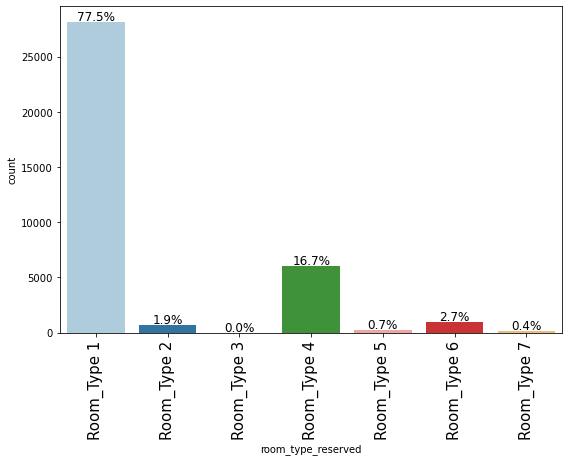

In [29]:
labeled_barplot(data, "room_type_reserved", perc=True)

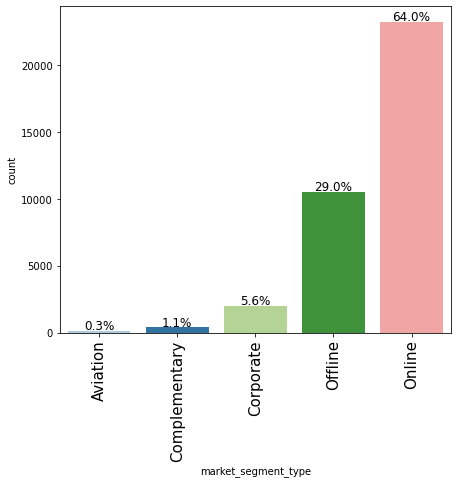

In [30]:
labeled_barplot(data, "market_segment_type", perc=True)

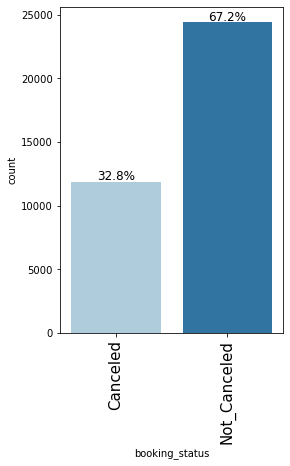

In [31]:
labeled_barplot(data, "booking_status", perc=True)

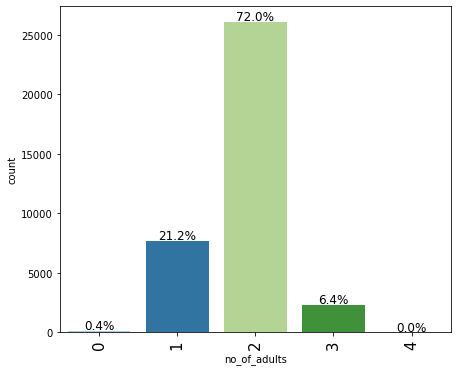

In [32]:
labeled_barplot(data, "no_of_adults", perc=True)

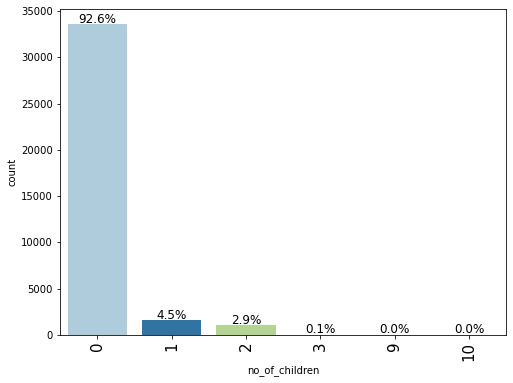

In [33]:
labeled_barplot(data, "no_of_children", perc=True)

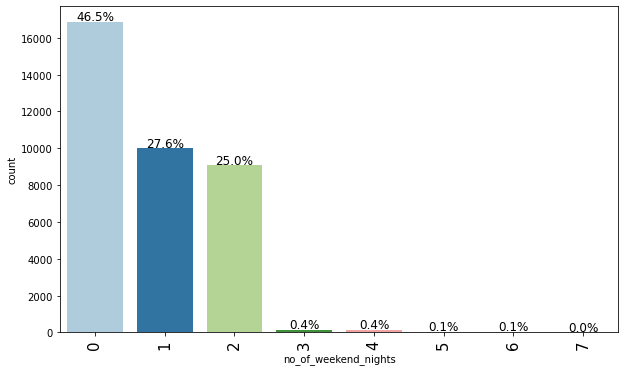

In [34]:
labeled_barplot(data, "no_of_weekend_nights", perc=True)

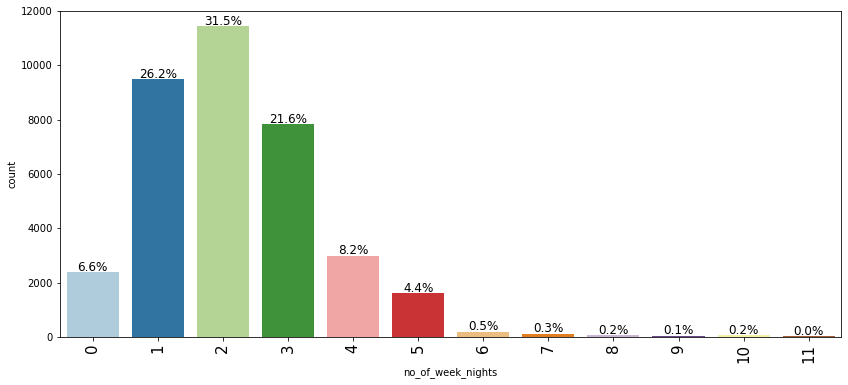

In [35]:
labeled_barplot(data, "no_of_week_nights", perc=True, n=12)

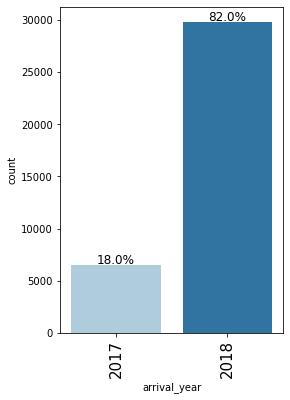

In [36]:
labeled_barplot(data, "arrival_year", perc=True)

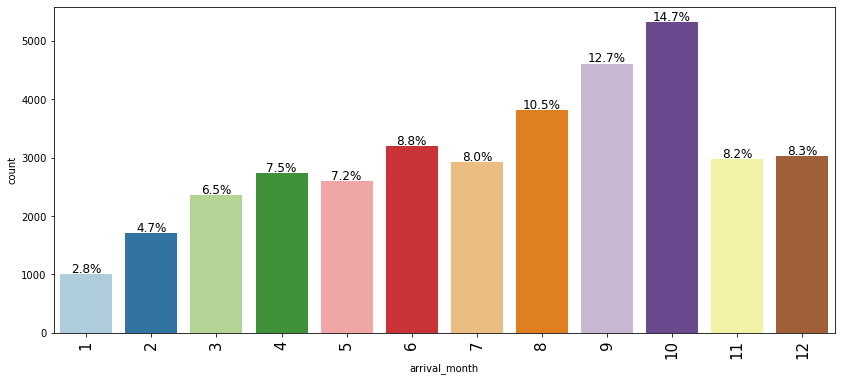

In [37]:
labeled_barplot(data, "arrival_month", perc=True)

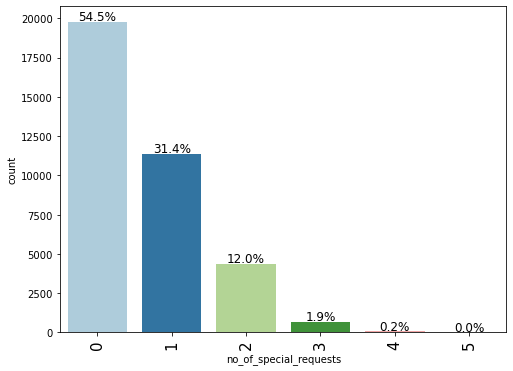

In [38]:
labeled_barplot(data, "no_of_special_requests", perc=True)

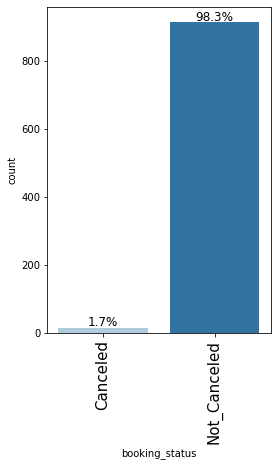

In [39]:
data_repeated = data[data.repeated_guest==1]
#data_repeated.head()
labeled_barplot(data_repeated, "booking_status", perc=True)

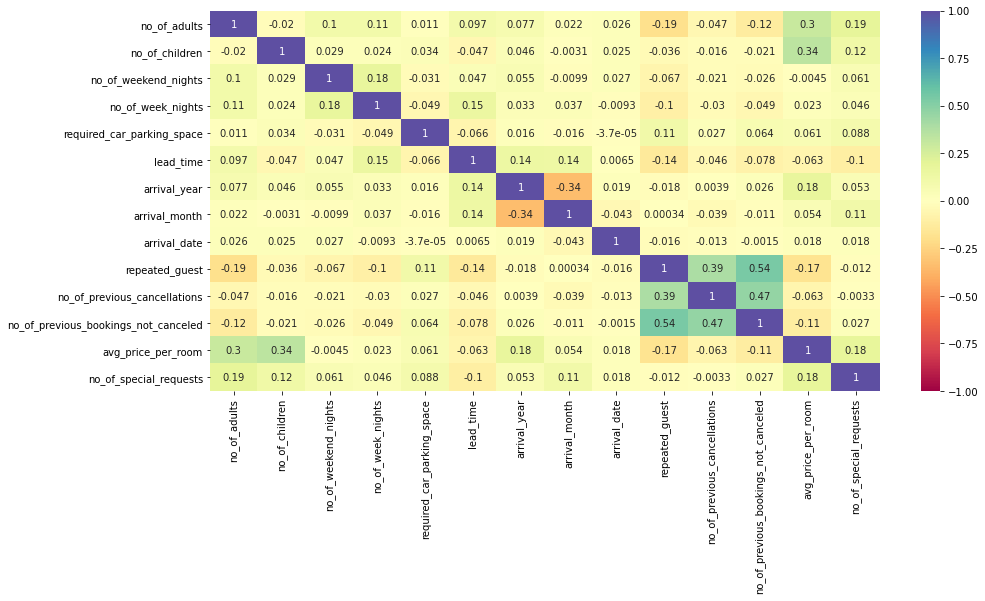

In [40]:
# why are the categorical variables not included in this example, but included in online shoppers purchase 
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

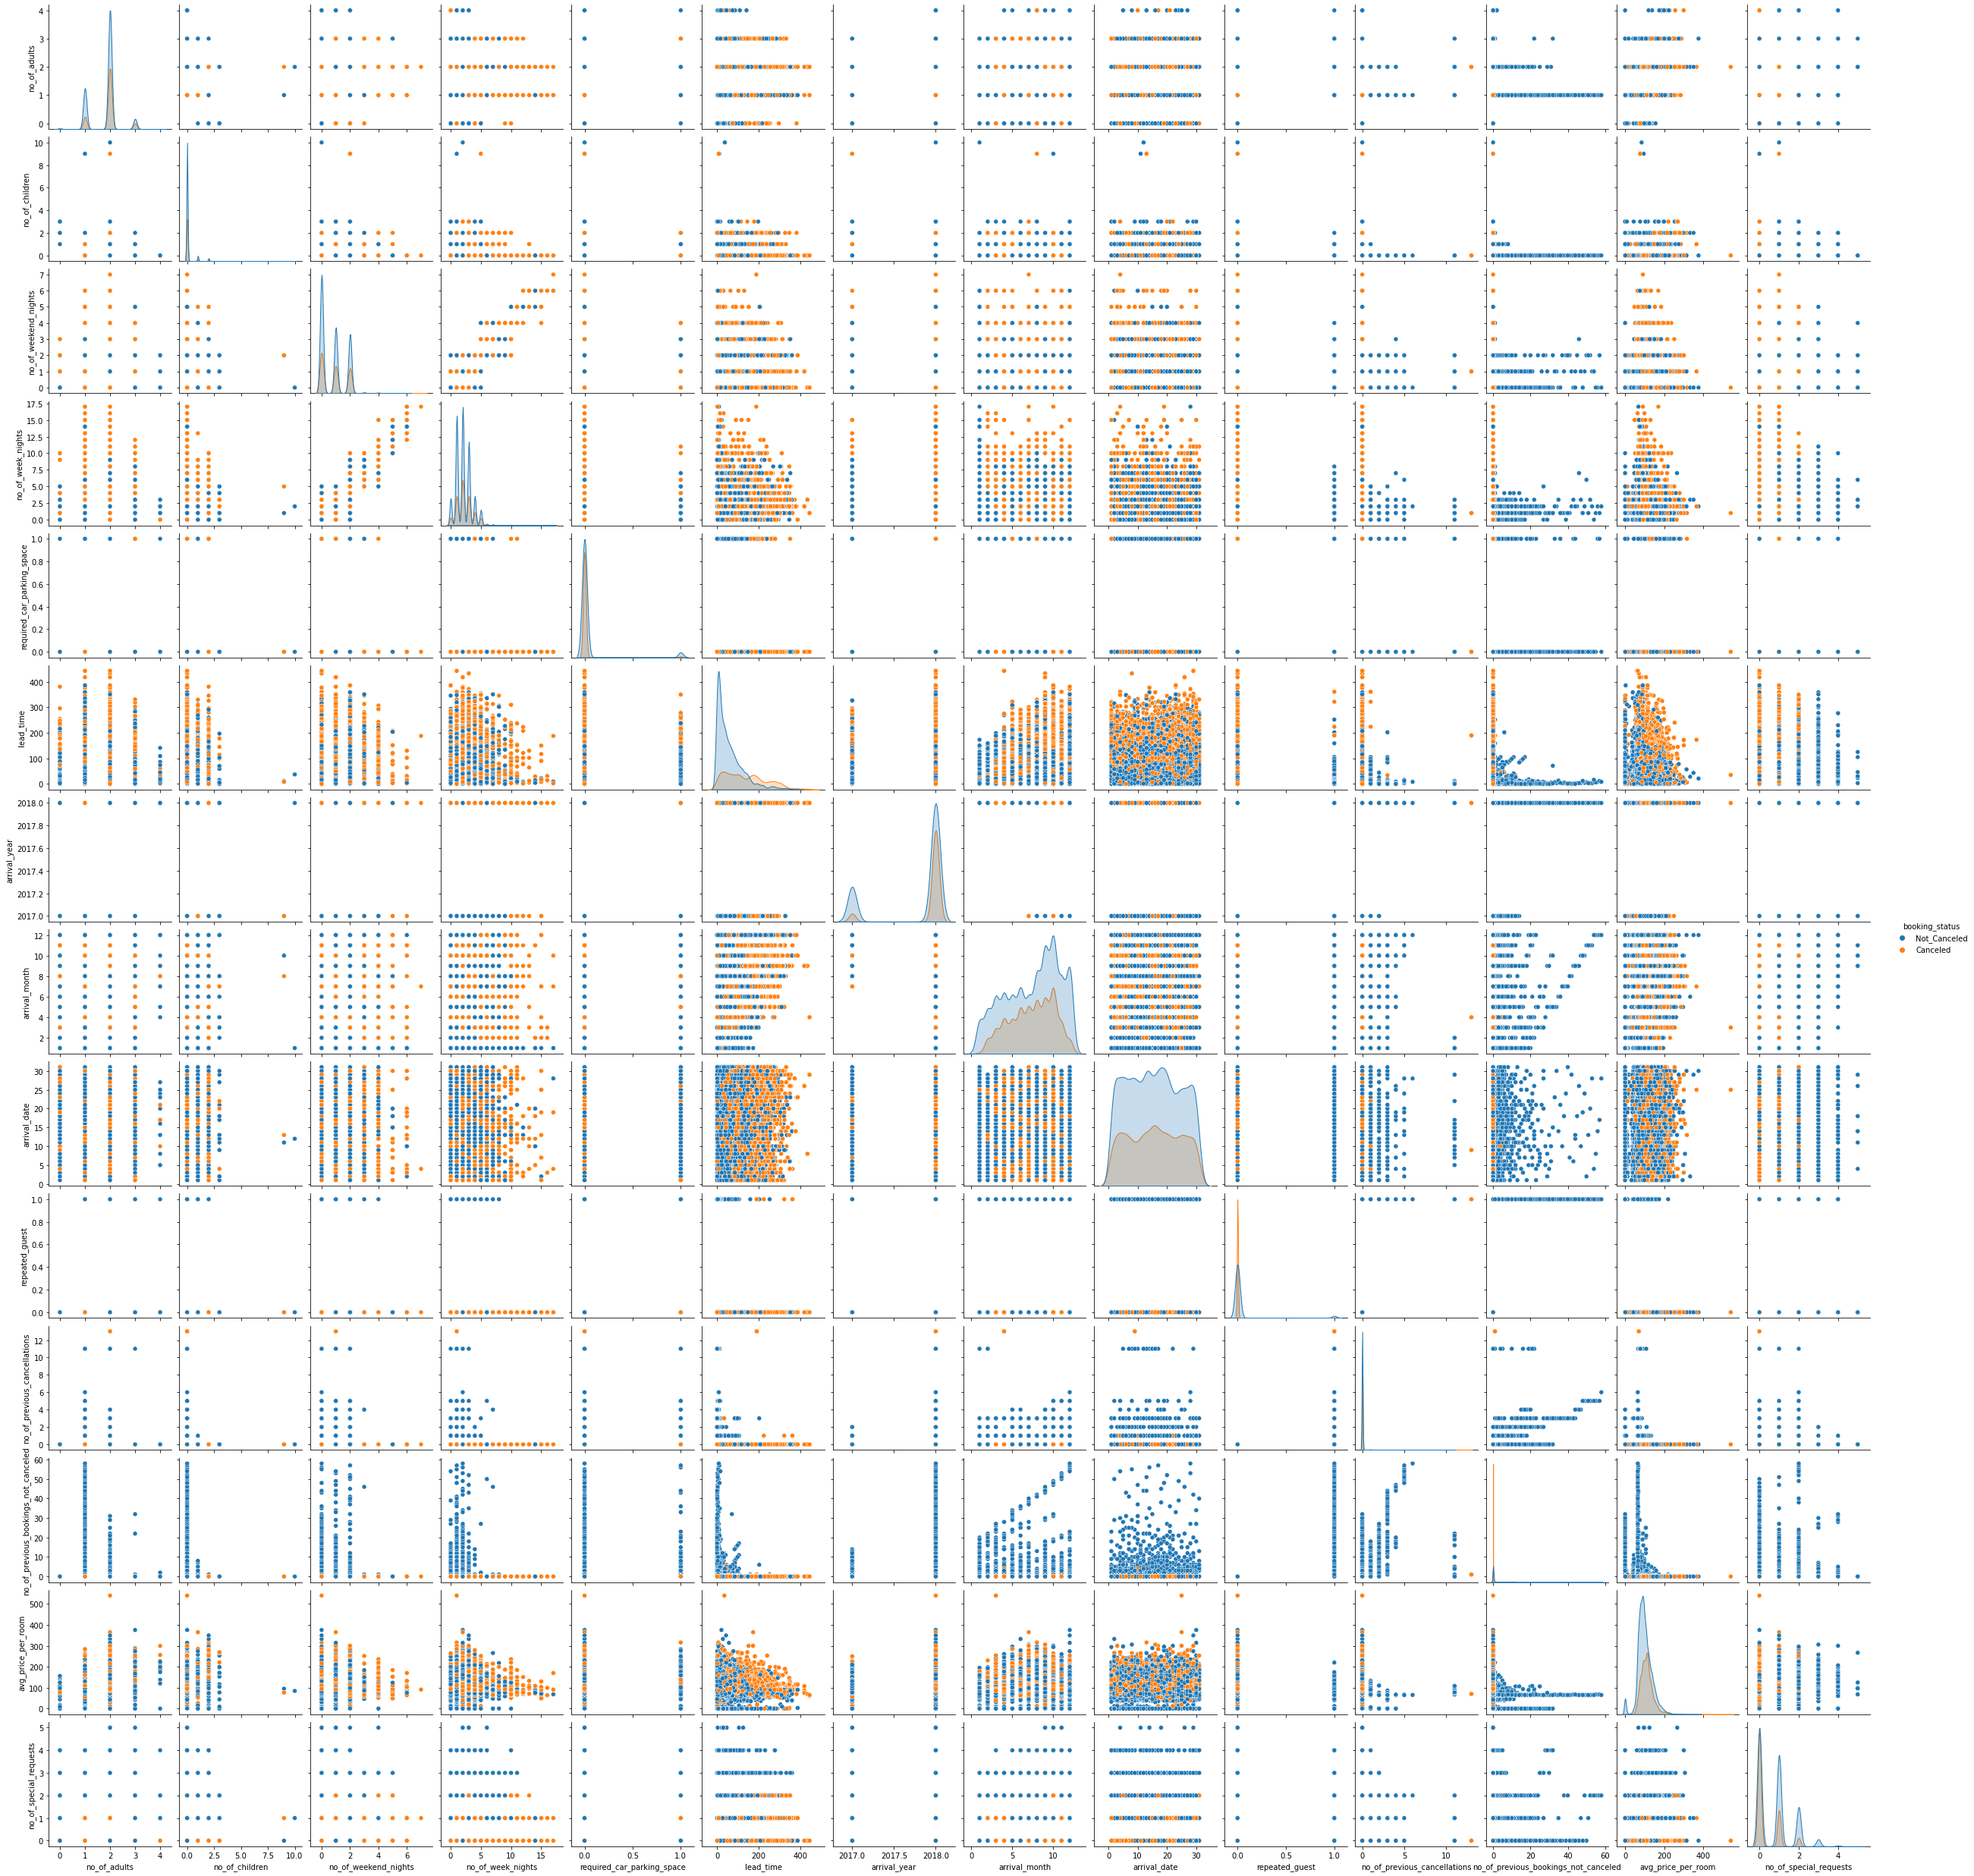

In [41]:
sns.pairplot(data=data, hue='booking_status')
plt.show()

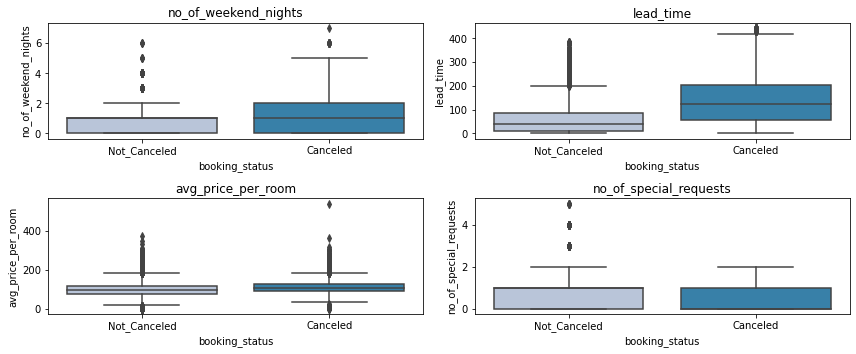

In [42]:
cols = data[
    [
        "no_of_weekend_nights",
        "lead_time",
        "avg_price_per_room",
        "no_of_special_requests"
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["booking_status"], data[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

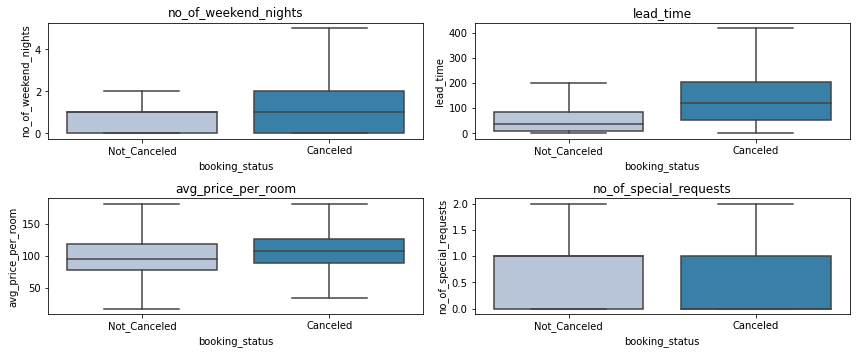

In [43]:
cols = data[
    [
        "no_of_weekend_nights",
        "lead_time",
        "avg_price_per_room",
        "no_of_special_requests"
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["booking_status"], data[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [44]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


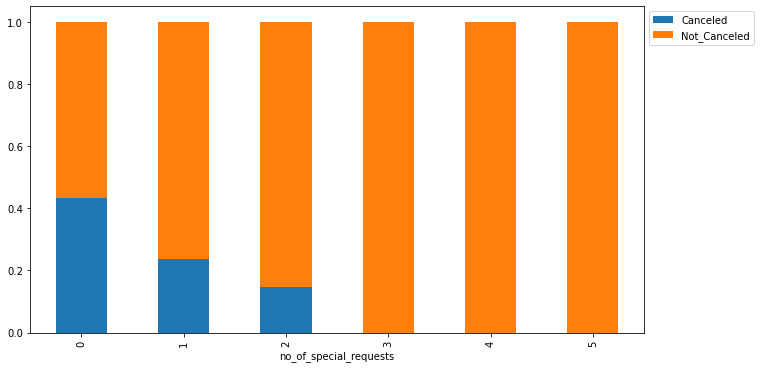

In [45]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

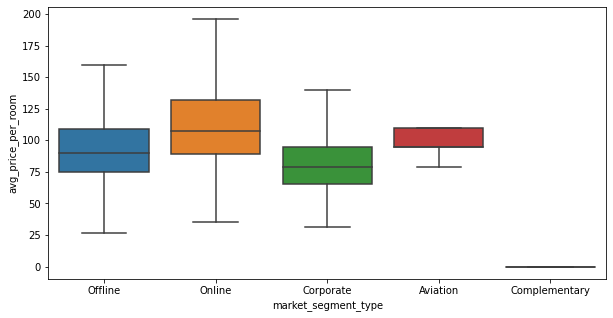

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["market_segment_type"], data["avg_price_per_room"], showfliers=False)
plt.show()

**EDA Insights**

**Most of our data includes guests who have two adults in their party, zero children, spend zero to two week end nights in the hotel, spend 1 to 4 week nights in the hotel, do not require a car space, have a lead time of less than 200 days, arrived in 2018, are not repeated guests, do not have previous cancellations, have not previously booked with the hotel, spend the night in a $50 to %150 hotel room, and have 0 to 1 special requests.**



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [47]:
data = data.drop("Booking_ID", axis=1)

In [48]:
# one hot encoding - get dummies 
# creating dummy varibles
dummy_data = pd.get_dummies(
    data,
    columns=[
        "type_of_meal_plan",
        "room_type_reserved",
        "market_segment_type",
        "booking_status",
    ],
    drop_first=True,
)
dummy_data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0             2               0                             0   
1             6               0                             0   
2            28               0                             0   
3            20               0                             0   
4            11               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                       0                              0   
1                       1                              0   
2                       0                              0   
3                       0                              0   
4                       0                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0  

In [49]:
# Let's look at the distribution of target variable
data["booking_status"].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [50]:
data["booking_status"].value_counts(1)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Building a Logistic Regression model

In [51]:
X = dummy_data.drop("booking_status_Not_Canceled", axis=1)  # Features
y = dummy_data["booking_status_Not_Canceled"].astype("int64")  # Labels (Target Variable)
X

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                               0        224          2017             10   
1                               0          5          2018             11   
2                               0          1          2018              2   
3                               0        211          2018              5   
4                               0         48          2018              4   
...                           ...        ...           ...            ...   
36270                           0         85          2018              8   
36271                           0        228          2018             10   
36272                           0        148          2018              7   
36273                           0         63          2018              4   
36274                           0        207          2018             12   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
0                 2               0                             0   
1                 6               0                             0   
2                28               0                             0   
3                20               0                             0   
4                11               0                             0   
...             ...             ...                           ...   
36270             3               0                             0   
36271            17               0                             0   
36272             1               0                             0   
36273            21               0                             0   
36274            30               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               94.50   
...                                     ...                 ...   
36270                                     0              167.80   
36271                                     0               90.95   
36272                                     0               98.39   
36273                                     0               94.50   
36274                                     0              161.67   

       no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   
...                       ...                            ...   
36270                       1          

In [52]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(25392, 27) (10883, 27)


In [53]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


In [54]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1    0.670644
0    0.329356
Name: booking_status_Not_Canceled, dtype: float64
Percentage of classes in test set:
1    0.676376
0    0.323624
Name: booking_status_Not_Canceled, dtype: float64


There is only a little bit of class imbalance 

In [55]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

         Current function value: 0.426215
         Iterations: 35


/Users/sydneystolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
# let's print the logistic regression summary
print(lg.summary())

                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25365
Method:                                    MLE   Df Model:                           26
Date:                         Fri, 25 Feb 2022   Pseudo R-squ.:                  0.3274
Time:                                 23:29:00   Log-Likelihood:                -10822.
converged:                               False   LL-Null:                       -16091.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_adults                            -0.1009      0.038     -2.685      0.007      

In [57]:
# predicting on training set
# default threshold is 0.5, if predicted probability is greater than 0.5 the observation will be classified as 1

pred_train = lg.predict(X_train) > 0.5
pred_train = np.round(pred_train)

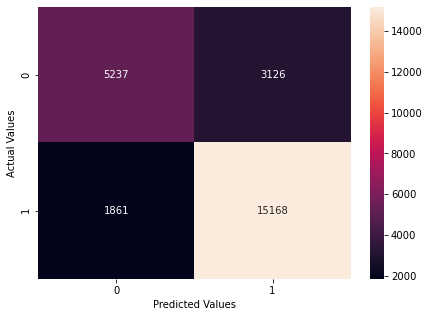

In [58]:
cm = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [59]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train))

Accuracy on training set :  0.8035995589161941


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [60]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

no_of_adults                             18.327604
no_of_children                            2.110591
no_of_weekend_nights                      2.003719
no_of_week_nights                         3.776277
required_car_parking_space                1.073702
lead_time                                 2.474124
arrival_year                            329.439218
arrival_month                             7.206294
arrival_date                              4.219627
repeated_guest                            1.827912
no_of_previous_cancellations              1.400396
no_of_previous_bookings_not_canceled      1.659869
avg_price_per_room                       18.598052
no_of_special_requests                    2.016933
type_of_meal_plan_Meal Plan 2             1.325659
type_of_meal_plan_Meal Plan 3             1.025416
type_of_meal_plan_Not Selected            1.437891
room_type_reserved_Room_Type 2            1.122473
room_type_reserved_Room_Type 3            1.003472
room_type_reserve

In [61]:
X_train1 = X_train.drop("arrival_year", axis=1)

In [62]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

no_of_adults                            18.257632
no_of_children                           2.110407
no_of_weekend_nights                     1.994877
no_of_week_nights                        3.734755
required_car_parking_space               1.073616
lead_time                                2.473596
arrival_month                            7.103096
arrival_date                             4.176361
repeated_guest                           1.819480
no_of_previous_cancellations             1.400361
no_of_previous_bookings_not_canceled     1.659678
avg_price_per_room                      18.000805
no_of_special_requests                   2.012391
type_of_meal_plan_Meal Plan 2            1.324121
type_of_meal_plan_Meal Plan 3            1.025409
type_of_meal_plan_Not Selected           1.434536
room_type_reserved_Room_Type 2           1.121631
room_type_reserved_Room_Type 3           1.003469
room_type_reserved_Room_Type 4           1.630707
room_type_reserved_Room_Type 5      

In [63]:
X_train2 = X_train1.drop("market_segment_type_Online", axis=1)

In [64]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

no_of_adults                            14.099249
no_of_children                           2.108158
no_of_weekend_nights                     1.969233
no_of_week_nights                        3.563059
required_car_parking_space               1.073567
lead_time                                2.456340
arrival_month                            6.528665
arrival_date                             3.902745
repeated_guest                           1.814445
no_of_previous_cancellations             1.399309
no_of_previous_bookings_not_canceled     1.659677
avg_price_per_room                      13.383149
no_of_special_requests                   2.008093
type_of_meal_plan_Meal Plan 2            1.308653
type_of_meal_plan_Meal Plan 3            1.025363
type_of_meal_plan_Not Selected           1.369358
room_type_reserved_Room_Type 2           1.108117
room_type_reserved_Room_Type 3           1.003464
room_type_reserved_Room_Type 4           1.575860
room_type_reserved_Room_Type 5      

In [65]:
X_train3 = X_train2.drop("no_of_adults", axis=1)

In [66]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

no_of_children                          2.073037
no_of_weekend_nights                    1.927577
no_of_week_nights                       3.469732
required_car_parking_space              1.073078
lead_time                               2.387198
arrival_month                           6.392902
arrival_date                            3.788891
repeated_guest                          1.814288
no_of_previous_cancellations            1.397232
no_of_previous_bookings_not_canceled    1.658564
avg_price_per_room                      9.089020
no_of_special_requests                  1.967900
type_of_meal_plan_Meal Plan 2           1.302158
type_of_meal_plan_Meal Plan 3           1.025274
type_of_meal_plan_Not Selected          1.320664
room_type_reserved_Room_Type 2          1.107983
room_type_reserved_Room_Type 3          1.003398
room_type_reserved_Room_Type 4          1.539797
room_type_reserved_Room_Type 5          1.030283
room_type_reserved_Room_Type 6          1.949634
room_t

## Model performance evaluation

In [67]:
# fitting the model on training set
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit()

         Current function value: 0.442911
         Iterations: 35


/Users/sydneystolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [68]:
# summary of initial logistic regression model
print(lg3.summary())

                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25368
Method:                                    MLE   Df Model:                           23
Date:                         Fri, 25 Feb 2022   Pseudo R-squ.:                  0.3011
Time:                                 23:29:02   Log-Likelihood:                -11246.
converged:                               False   LL-Null:                       -16091.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_children                          -0.2078      0.056     -3.731      0.000      

In [69]:
# dropping highest p value first 
X_train4 = X_train3.drop("no_of_weekend_nights", axis=1)
X_train4

no_of_children  no_of_week_nights  required_car_parking_space  \
13662               0                  1                           0   
26641               0                  3                           0   
17835               0                  3                           0   
21485               0                  3                           0   
5670                0                  2                           0   
...               ...                ...                         ...   
7813                0                  1                           0   
32511               0                  2                           0   
5192                0                  2                           0   
12172               2                  1                           0   
33003               0                  3                           0   

       lead_time  arrival_month  arrival_date  repeated_guest  \
13662        163             10            15               0   
26641        113              3            31               0   
17835        359             10            14               0   
21485        136              6            29               0   
5670          21              8            15               0   
...          ...            ...           ...             ...   
7813          66             11            12               0   
32511         70              4            22               0   
5192          24              6             6               0   
12172          3              3            21               0   
33003        222              8            31               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
13662                             0                                     0   
26641                             0                                     0   
17835                             0                                     0   
21485                             0                                     0   
5670                              0                                     0   
...                             ...                                   ...   
7813                              0                                     0   
32511                             0                                     0   
5192                              0                                     0   
12172                             0                                     0   
33003                             0                                     0   

       avg_price_per_room  no_of_special_requests  \
13662              115.00                       0   
26641               78.15                       1   
17835               78.00                       1   
21485               85.50                       0   
5670               151.00                       0   
...                   ...                     ...   
7813               105.33                       1   
32511              105.30                       1   
5192               120.00                       0   
12172              181.00                       0   
33003               96.30                       1   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
13662                              0                              0   
26641                              0                              0   
17835                              0                              0   
21485                              0                              0   
5670                               0                              0   
...                              ...                            ...   
7813                               0                              0   
32511                              0                              0   
5192                               0                              0   
12172                              0                              0   
33003             

In [70]:
# fitting the model on training set
logit4 = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit4.fit()

pred_train4 = lg4.predict(X_train4)
pred_train4 = np.round(pred_train4)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))

         Current function value: 0.442911
         Iterations: 35
Accuracy on training set :  0.7930056710775047


/Users/sydneystolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [71]:
# summary of initial logistic regression model
print(lg4.summary())

                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25369
Method:                                    MLE   Df Model:                           22
Date:                         Fri, 25 Feb 2022   Pseudo R-squ.:                  0.3011
Time:                                 23:29:02   Log-Likelihood:                -11246.
converged:                               False   LL-Null:                       -16091.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_children                          -0.2077      0.056     -3.731      0.000      

In [72]:
# dropping highest p value first 
X_train5 = X_train4.drop("type_of_meal_plan_Meal Plan 3", axis=1)
X_train5

no_of_children  no_of_week_nights  required_car_parking_space  \
13662               0                  1                           0   
26641               0                  3                           0   
17835               0                  3                           0   
21485               0                  3                           0   
5670                0                  2                           0   
...               ...                ...                         ...   
7813                0                  1                           0   
32511               0                  2                           0   
5192                0                  2                           0   
12172               2                  1                           0   
33003               0                  3                           0   

       lead_time  arrival_month  arrival_date  repeated_guest  \
13662        163             10            15               0   
26641        113              3            31               0   
17835        359             10            14               0   
21485        136              6            29               0   
5670          21              8            15               0   
...          ...            ...           ...             ...   
7813          66             11            12               0   
32511         70              4            22               0   
5192          24              6             6               0   
12172          3              3            21               0   
33003        222              8            31               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
13662                             0                                     0   
26641                             0                                     0   
17835                             0                                     0   
21485                             0                                     0   
5670                              0                                     0   
...                             ...                                   ...   
7813                              0                                     0   
32511                             0                                     0   
5192                              0                                     0   
12172                             0                                     0   
33003                             0                                     0   

       avg_price_per_room  no_of_special_requests  \
13662              115.00                       0   
26641               78.15                       1   
17835               78.00                       1   
21485               85.50                       0   
5670               151.00                       0   
...                   ...                     ...   
7813               105.33                       1   
32511              105.30                       1   
5192               120.00                       0   
12172              181.00                       0   
33003               96.30                       1   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
13662                              0                               0   
26641                              0                               0   
17835                              0                               0   
21485                              0                               1   
5670                               0                               0   
...                              ...                             ...   
7813                               0                               0   
32511                              0                               0   
5192                               0                               0   
12172                              0                               0   
33003  

In [73]:
# fitting the model on training set
logit5 = sm.Logit(y_train, X_train5.astype(float))
lg5 = logit5.fit()

pred_train5 = lg5.predict(X_train5)
pred_train5 = np.round(pred_train5)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train5))

         Current function value: 0.442992
         Iterations: 35
Accuracy on training set :  0.7929269061121613


/Users/sydneystolle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [74]:
# summary of initial logistic regression model
print(lg5.summary())

                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25370
Method:                                    MLE   Df Model:                           21
Date:                         Fri, 25 Feb 2022   Pseudo R-squ.:                  0.3010
Time:                                 23:29:03   Log-Likelihood:                -11248.
converged:                               False   LL-Null:                       -16091.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_children                          -0.2074      0.056     -3.725      0.000      

In [75]:
# dropping highest p value first 
X_train6 = X_train5.drop("market_segment_type_Complementary", axis=1)
X_train6

no_of_children  no_of_week_nights  required_car_parking_space  \
13662               0                  1                           0   
26641               0                  3                           0   
17835               0                  3                           0   
21485               0                  3                           0   
5670                0                  2                           0   
...               ...                ...                         ...   
7813                0                  1                           0   
32511               0                  2                           0   
5192                0                  2                           0   
12172               2                  1                           0   
33003               0                  3                           0   

       lead_time  arrival_month  arrival_date  repeated_guest  \
13662        163             10            15               0   
26641        113              3            31               0   
17835        359             10            14               0   
21485        136              6            29               0   
5670          21              8            15               0   
...          ...            ...           ...             ...   
7813          66             11            12               0   
32511         70              4            22               0   
5192          24              6             6               0   
12172          3              3            21               0   
33003        222              8            31               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
13662                             0                                     0   
26641                             0                                     0   
17835                             0                                     0   
21485                             0                                     0   
5670                              0                                     0   
...                             ...                                   ...   
7813                              0                                     0   
32511                             0                                     0   
5192                              0                                     0   
12172                             0                                     0   
33003                             0                                     0   

       avg_price_per_room  no_of_special_requests  \
13662              115.00                       0   
26641               78.15                       1   
17835               78.00                       1   
21485               85.50                       0   
5670               151.00                       0   
...                   ...                     ...   
7813               105.33                       1   
32511              105.30                       1   
5192               120.00                       0   
12172              181.00                       0   
33003               96.30                       1   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
13662                              0                               0   
26641                              0                               0   
17835                              0                               0   
21485                              0                               1   
5670                               0                               0   
...                              ...                             ...   
7813                               0                               0   
32511                              0                               0   
5192                               0                               0   
12172                              0                               0   
33003  

In [76]:
# fitting the model on training set
logit6 = sm.Logit(y_train, X_train6.astype(float))
lg6 = logit6.fit()

pred_train6 = lg6.predict(X_train6)
pred_train6 = np.round(pred_train6)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train6))

Optimization terminated successfully.
         Current function value: 0.444636
         Iterations 11
Accuracy on training set :  0.793241965973535


In [77]:
# summary of initial logistic regression model
print(lg6.summary())

                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25371
Method:                                    MLE   Df Model:                           20
Date:                         Fri, 25 Feb 2022   Pseudo R-squ.:                  0.2984
Time:                                 23:29:03   Log-Likelihood:                -11290.
converged:                                True   LL-Null:                       -16091.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_children                          -0.2027      0.055     -3.654      0.000      

In [78]:
# dropping highest p value first 
X_train7 = X_train6.drop("room_type_reserved_Room_Type 3", axis=1)
X_train7

no_of_children  no_of_week_nights  required_car_parking_space  \
13662               0                  1                           0   
26641               0                  3                           0   
17835               0                  3                           0   
21485               0                  3                           0   
5670                0                  2                           0   
...               ...                ...                         ...   
7813                0                  1                           0   
32511               0                  2                           0   
5192                0                  2                           0   
12172               2                  1                           0   
33003               0                  3                           0   

       lead_time  arrival_month  arrival_date  repeated_guest  \
13662        163             10            15               0   
26641        113              3            31               0   
17835        359             10            14               0   
21485        136              6            29               0   
5670          21              8            15               0   
...          ...            ...           ...             ...   
7813          66             11            12               0   
32511         70              4            22               0   
5192          24              6             6               0   
12172          3              3            21               0   
33003        222              8            31               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
13662                             0                                     0   
26641                             0                                     0   
17835                             0                                     0   
21485                             0                                     0   
5670                              0                                     0   
...                             ...                                   ...   
7813                              0                                     0   
32511                             0                                     0   
5192                              0                                     0   
12172                             0                                     0   
33003                             0                                     0   

       avg_price_per_room  no_of_special_requests  \
13662              115.00                       0   
26641               78.15                       1   
17835               78.00                       1   
21485               85.50                       0   
5670               151.00                       0   
...                   ...                     ...   
7813               105.33                       1   
32511              105.30                       1   
5192               120.00                       0   
12172              181.00                       0   
33003               96.30                       1   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
13662                              0                               0   
26641                              0                               0   
17835                              0                               0   
21485                              0                               1   
5670                               0                               0   
...                              ...                             ...   
7813                               0                               0   
32511                              0                               0   
5192                               0                               0   
12172                              0                               0   
33003  

In [79]:
# fitting the model on training set
logit7 = sm.Logit(y_train, X_train7.astype(float))
lg7 = logit7.fit()

pred_train7 = lg7.predict(X_train7)
pred_train7 = np.round(pred_train7)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train7))

Optimization terminated successfully.
         Current function value: 0.444638
         Iterations 11
Accuracy on training set :  0.793241965973535


In [80]:
# summary of initial logistic regression model
print(lg7.summary())

                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25372
Method:                                    MLE   Df Model:                           19
Date:                         Fri, 25 Feb 2022   Pseudo R-squ.:                  0.2984
Time:                                 23:29:03   Log-Likelihood:                -11290.
converged:                                True   LL-Null:                       -16091.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_children                          -0.2027      0.055     -3.654      0.000      

In [81]:
# dropping highest p value first 
X_train8 = X_train7.drop("room_type_reserved_Room_Type 7", axis=1)
X_train8

no_of_children  no_of_week_nights  required_car_parking_space  \
13662               0                  1                           0   
26641               0                  3                           0   
17835               0                  3                           0   
21485               0                  3                           0   
5670                0                  2                           0   
...               ...                ...                         ...   
7813                0                  1                           0   
32511               0                  2                           0   
5192                0                  2                           0   
12172               2                  1                           0   
33003               0                  3                           0   

       lead_time  arrival_month  arrival_date  repeated_guest  \
13662        163             10            15               0   
26641        113              3            31               0   
17835        359             10            14               0   
21485        136              6            29               0   
5670          21              8            15               0   
...          ...            ...           ...             ...   
7813          66             11            12               0   
32511         70              4            22               0   
5192          24              6             6               0   
12172          3              3            21               0   
33003        222              8            31               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
13662                             0                                     0   
26641                             0                                     0   
17835                             0                                     0   
21485                             0                                     0   
5670                              0                                     0   
...                             ...                                   ...   
7813                              0                                     0   
32511                             0                                     0   
5192                              0                                     0   
12172                             0                                     0   
33003                             0                                     0   

       avg_price_per_room  no_of_special_requests  \
13662              115.00                       0   
26641               78.15                       1   
17835               78.00                       1   
21485               85.50                       0   
5670               151.00                       0   
...                   ...                     ...   
7813               105.33                       1   
32511              105.30                       1   
5192               120.00                       0   
12172              181.00                       0   
33003               96.30                       1   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
13662                              0                               0   
26641                              0                               0   
17835                              0                               0   
21485                              0                               1   
5670                               0                               0   
...                              ...                             ...   
7813                               0                               0   
32511                              0                               0   
5192                               0                               0   
12172                              0                               0   
33003  

In [82]:
# fitting the model on training set
logit8 = sm.Logit(y_train, X_train8.astype(float))
lg8 = logit8.fit()

pred_train8 = lg8.predict(X_train8)
pred_train8 = np.round(pred_train8)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train8))

Optimization terminated successfully.
         Current function value: 0.444645
         Iterations 11
Accuracy on training set :  0.7930844360428482


In [83]:
# summary of initial logistic regression model
print(lg8.summary())

                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25373
Method:                                    MLE   Df Model:                           18
Date:                         Fri, 25 Feb 2022   Pseudo R-squ.:                  0.2984
Time:                                 23:29:03   Log-Likelihood:                -11290.
converged:                                True   LL-Null:                       -16091.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_children                          -0.1977      0.055     -3.611      0.000      

In [84]:
# dropping highest p value first 
X_train9 = X_train8.drop("room_type_reserved_Room_Type 6", axis=1)
X_train9

no_of_children  no_of_week_nights  required_car_parking_space  \
13662               0                  1                           0   
26641               0                  3                           0   
17835               0                  3                           0   
21485               0                  3                           0   
5670                0                  2                           0   
...               ...                ...                         ...   
7813                0                  1                           0   
32511               0                  2                           0   
5192                0                  2                           0   
12172               2                  1                           0   
33003               0                  3                           0   

       lead_time  arrival_month  arrival_date  repeated_guest  \
13662        163             10            15               0   
26641        113              3            31               0   
17835        359             10            14               0   
21485        136              6            29               0   
5670          21              8            15               0   
...          ...            ...           ...             ...   
7813          66             11            12               0   
32511         70              4            22               0   
5192          24              6             6               0   
12172          3              3            21               0   
33003        222              8            31               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
13662                             0                                     0   
26641                             0                                     0   
17835                             0                                     0   
21485                             0                                     0   
5670                              0                                     0   
...                             ...                                   ...   
7813                              0                                     0   
32511                             0                                     0   
5192                              0                                     0   
12172                             0                                     0   
33003                             0                                     0   

       avg_price_per_room  no_of_special_requests  \
13662              115.00                       0   
26641               78.15                       1   
17835               78.00                       1   
21485               85.50                       0   
5670               151.00                       0   
...                   ...                     ...   
7813               105.33                       1   
32511              105.30                       1   
5192               120.00                       0   
12172              181.00                       0   
33003               96.30                       1   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
13662                              0                               0   
26641                              0                               0   
17835                              0                               0   
21485                              0                               1   
5670                               0                               0   
...                              ...                             ...   
7813                               0                               0   
32511                              0                               0   
5192                               0                               0   
12172                              0                               0   
33003  

In [85]:
# fitting the model on training set
logit9 = sm.Logit(y_train, X_train9.astype(float))
lg9 = logit9.fit()

pred_train9 = lg9.predict(X_train9)
pred_train9 = np.round(pred_train9)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train9))

Optimization terminated successfully.
         Current function value: 0.444670
         Iterations 11
Accuracy on training set :  0.7923361688720857


In [86]:
# summary of initial logistic regression model
print(lg9.summary())

                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25374
Method:                                    MLE   Df Model:                           17
Date:                         Fri, 25 Feb 2022   Pseudo R-squ.:                  0.2983
Time:                                 23:29:03   Log-Likelihood:                -11291.
converged:                                True   LL-Null:                       -16091.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_children                          -0.1596      0.044     -3.663      0.000      

In [87]:
# dropping highest p value first 
X_train10 = X_train9.drop("no_of_previous_bookings_not_canceled", axis=1)
X_train10

no_of_children  no_of_week_nights  required_car_parking_space  \
13662               0                  1                           0   
26641               0                  3                           0   
17835               0                  3                           0   
21485               0                  3                           0   
5670                0                  2                           0   
...               ...                ...                         ...   
7813                0                  1                           0   
32511               0                  2                           0   
5192                0                  2                           0   
12172               2                  1                           0   
33003               0                  3                           0   

       lead_time  arrival_month  arrival_date  repeated_guest  \
13662        163             10            15               0   
26641        113              3            31               0   
17835        359             10            14               0   
21485        136              6            29               0   
5670          21              8            15               0   
...          ...            ...           ...             ...   
7813          66             11            12               0   
32511         70              4            22               0   
5192          24              6             6               0   
12172          3              3            21               0   
33003        222              8            31               0   

       no_of_previous_cancellations  avg_price_per_room  \
13662                             0              115.00   
26641                             0               78.15   
17835                             0               78.00   
21485                             0               85.50   
5670                              0              151.00   
...                             ...                 ...   
7813                              0              105.33   
32511                             0              105.30   
5192                              0              120.00   
12172                             0              181.00   
33003                             0               96.30   

       no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
13662                       0                              0   
26641                       1                              0   
17835                       1                              0   
21485                       0                              0   
5670                        0                              0   
...                       ...                            ...   
7813                        1                              0   
32511                       1                              0   
5192                        0                              0   
12172                       0                              0   
33003                       1                              0   

       type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
13662                               0                               0   
26641                               0                               1   
17835                               0                               0   
21485                               1                               0   
5670                                0                               0   
...                               ...                             ...   
7813                                0                               0   
32511                               0                               0   
5192                                0                               0   
12172                               0                               0   
33003                               0                               0   

      

In [88]:
# fitting the model on training set
logit10 = sm.Logit(y_train, X_train10.astype(float))
lg10 = logit10.fit()

pred_train10 = lg10.predict(X_train10)
pred_train10 = np.round(pred_train10)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train10))

Optimization terminated successfully.
         Current function value: 0.444727
         Iterations 9
Accuracy on training set :  0.7922574039067423


In [89]:
# summary of new logistic regression model
print(lg10.summary())

                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25375
Method:                                    MLE   Df Model:                           16
Date:                         Fri, 25 Feb 2022   Pseudo R-squ.:                  0.2982
Time:                                 23:29:03   Log-Likelihood:                -11293.
converged:                                True   LL-Null:                       -16091.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
no_of_children                    -0.1597      0.044     -3.663      0.000      -0.245      -0.074

In [90]:
# dropping highest p value first 
X_train11 = X_train10.drop("room_type_reserved_Room_Type 4", axis=1)
X_train11

no_of_children  no_of_week_nights  required_car_parking_space  \
13662               0                  1                           0   
26641               0                  3                           0   
17835               0                  3                           0   
21485               0                  3                           0   
5670                0                  2                           0   
...               ...                ...                         ...   
7813                0                  1                           0   
32511               0                  2                           0   
5192                0                  2                           0   
12172               2                  1                           0   
33003               0                  3                           0   

       lead_time  arrival_month  arrival_date  repeated_guest  \
13662        163             10            15               0   
26641        113              3            31               0   
17835        359             10            14               0   
21485        136              6            29               0   
5670          21              8            15               0   
...          ...            ...           ...             ...   
7813          66             11            12               0   
32511         70              4            22               0   
5192          24              6             6               0   
12172          3              3            21               0   
33003        222              8            31               0   

       no_of_previous_cancellations  avg_price_per_room  \
13662                             0              115.00   
26641                             0               78.15   
17835                             0               78.00   
21485                             0               85.50   
5670                              0              151.00   
...                             ...                 ...   
7813                              0              105.33   
32511                             0              105.30   
5192                              0              120.00   
12172                             0              181.00   
33003                             0               96.30   

       no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
13662                       0                              0   
26641                       1                              0   
17835                       1                              0   
21485                       0                              0   
5670                        0                              0   
...                       ...                            ...   
7813                        1                              0   
32511                       1                              0   
5192                        0                              0   
12172                       0                              0   
33003                       1                              0   

       type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
13662                               0                               0   
26641                               0                               1   
17835                               0                               0   
21485                               1                               0   
5670                                0                               0   
...                               ...                             ...   
7813                                0                               0   
32511                               0                               0   
5192                                0                               0   
12172                               0                               0   
33003                               0                               0   

      

In [91]:
# fitting the model on training set
logit11 = sm.Logit(y_train, X_train11.astype(float))
lg11 = logit11.fit()

pred_train11 = lg11.predict(X_train11)
pred_train11 = np.round(pred_train11)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train11))

Optimization terminated successfully.
         Current function value: 0.444758
         Iterations 9
Accuracy on training set :  0.7925330812854442


In [92]:
# summary of new logistic regression model
print(lg11.summary())

                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25376
Method:                                    MLE   Df Model:                           15
Date:                         Fri, 25 Feb 2022   Pseudo R-squ.:                  0.2982
Time:                                 23:29:03   Log-Likelihood:                -11293.
converged:                                True   LL-Null:                       -16091.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
no_of_children                    -0.1727      0.042     -4.083      0.000      -0.256      -0.090

In [93]:
# dropping highest p value first 
X_train12 = X_train11.drop("type_of_meal_plan_Not Selected", axis=1)
X_train12

no_of_children  no_of_week_nights  required_car_parking_space  \
13662               0                  1                           0   
26641               0                  3                           0   
17835               0                  3                           0   
21485               0                  3                           0   
5670                0                  2                           0   
...               ...                ...                         ...   
7813                0                  1                           0   
32511               0                  2                           0   
5192                0                  2                           0   
12172               2                  1                           0   
33003               0                  3                           0   

       lead_time  arrival_month  arrival_date  repeated_guest  \
13662        163             10            15               0   
26641        113              3            31               0   
17835        359             10            14               0   
21485        136              6            29               0   
5670          21              8            15               0   
...          ...            ...           ...             ...   
7813          66             11            12               0   
32511         70              4            22               0   
5192          24              6             6               0   
12172          3              3            21               0   
33003        222              8            31               0   

       no_of_previous_cancellations  avg_price_per_room  \
13662                             0              115.00   
26641                             0               78.15   
17835                             0               78.00   
21485                             0               85.50   
5670                              0              151.00   
...                             ...                 ...   
7813                              0              105.33   
32511                             0              105.30   
5192                              0              120.00   
12172                             0              181.00   
33003                             0               96.30   

       no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
13662                       0                              0   
26641                       1                              0   
17835                       1                              0   
21485                       0                              0   
5670                        0                              0   
...                       ...                            ...   
7813                        1                              0   
32511                       1                              0   
5192                        0                              0   
12172                       0                              0   
33003                       1                              0   

       room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 5  \
13662                               0                               0   
26641                               1                               0   
17835                               0                               0   
21485                               0                               0   
5670                                0                               0   
...                               ...                             ...   
7813                                0                               0   
32511                               0                               0   
5192                                0                               0   
12172                               0                               0   
33003                               0                               0   

      

In [94]:
# fitting the model on training set
logit12 = sm.Logit(y_train, X_train12.astype(float))
lg12 = logit12.fit()

pred_train12 = lg12.predict(X_train12)
pred_train12 = np.round(pred_train12)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train12))

Optimization terminated successfully.
         Current function value: 0.444798
         Iterations 9
Accuracy on training set :  0.7923755513547575


In [95]:
# summary of new logistic regression model
print(lg12.summary())

                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25377
Method:                                    MLE   Df Model:                           14
Date:                         Fri, 25 Feb 2022   Pseudo R-squ.:                  0.2981
Time:                                 23:29:03   Log-Likelihood:                -11294.
converged:                                True   LL-Null:                       -16091.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
no_of_children                    -0.1792      0.042     -4.259      0.000      -0.262      -0.097

In [96]:
# dropping highest p value first 
X_train13 = X_train12.drop("room_type_reserved_Room_Type 5", axis=1)
X_train13

no_of_children  no_of_week_nights  required_car_parking_space  \
13662               0                  1                           0   
26641               0                  3                           0   
17835               0                  3                           0   
21485               0                  3                           0   
5670                0                  2                           0   
...               ...                ...                         ...   
7813                0                  1                           0   
32511               0                  2                           0   
5192                0                  2                           0   
12172               2                  1                           0   
33003               0                  3                           0   

       lead_time  arrival_month  arrival_date  repeated_guest  \
13662        163             10            15               0   
26641        113              3            31               0   
17835        359             10            14               0   
21485        136              6            29               0   
5670          21              8            15               0   
...          ...            ...           ...             ...   
7813          66             11            12               0   
32511         70              4            22               0   
5192          24              6             6               0   
12172          3              3            21               0   
33003        222              8            31               0   

       no_of_previous_cancellations  avg_price_per_room  \
13662                             0              115.00   
26641                             0               78.15   
17835                             0               78.00   
21485                             0               85.50   
5670                              0              151.00   
...                             ...                 ...   
7813                              0              105.33   
32511                             0              105.30   
5192                              0              120.00   
12172                             0              181.00   
33003                             0               96.30   

       no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
13662                       0                              0   
26641                       1                              0   
17835                       1                              0   
21485                       0                              0   
5670                        0                              0   
...                       ...                            ...   
7813                        1                              0   
32511                       1                              0   
5192                        0                              0   
12172                       0                              0   
33003                       1                              0   

       room_type_reserved_Room_Type 2  market_segment_type_Corporate  \
13662                               0                              0   
26641                               1                              0   
17835                               0                              0   
21485                               0                              0   
5670                                0                              0   
...                               ...                            ...   
7813                                0                              0   
32511                               0                              0   
5192                                0                              0   
12172                               0                              0   
33003                               0                              0   

       market_segm

In [97]:
# fitting the model on training set
logit13 = sm.Logit(y_train, X_train13.astype(float))
lg13 = logit13.fit()

pred_train13 = lg13.predict(X_train13)
pred_train13 = np.round(pred_train13)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train13))

Optimization terminated successfully.
         Current function value: 0.444837
         Iterations 9
Accuracy on training set :  0.7924149338374291


In [98]:
# summary of new logistic regression model
print(lg13.summary())

                                Logit Regression Results                               
Dep. Variable:     booking_status_Not_Canceled   No. Observations:                25392
Model:                                   Logit   Df Residuals:                    25378
Method:                                    MLE   Df Model:                           13
Date:                         Fri, 25 Feb 2022   Pseudo R-squ.:                  0.2981
Time:                                 23:29:03   Log-Likelihood:                -11295.
converged:                                True   LL-Null:                       -16091.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
no_of_children                    -0.1789      0.042     -4.254      0.000      -0.261      -0.096

In [99]:
# converting coefficients to odds
odds = np.exp(lg13.params)

# adding the odds to a dataframe
pd.DataFrame(odds, X_train13.columns, columns=["odds"]).T

no_of_children  no_of_week_nights  required_car_parking_space  \
odds        0.836176           1.063582                     4.84254   

      lead_time  arrival_month  arrival_date  repeated_guest  \
odds   0.984844        1.12084      1.018663       24.184352   

      no_of_previous_cancellations  avg_price_per_room  \
odds                       0.82458            0.993832   

      no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
odds                4.345588                       0.730606   

      room_type_reserved_Room_Type 2  market_segment_type_Corporate  \
odds                        2.098681                       4.320259   

      market_segment_type_Offline  
odds                     9.150489

**Our y variable is booking status not cancelled which = 1 when customer does not cancel.**

**Repeated guests have a 24.18 times chance of not cancelling their reservation.** 

In [100]:
# finding the percentage change
perc_change_odds = (np.exp(lg13.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, X_train13.columns, columns=["change_odds%"])

change_odds%
no_of_children                    -16.382441
no_of_week_nights                   6.358237
required_car_parking_space        384.254014
lead_time                          -1.515592
arrival_month                      12.084044
arrival_date                        1.866251
repeated_guest                   2318.435236
no_of_previous_cancellations      -17.541977
avg_price_per_room                 -0.616831
no_of_special_requests            334.558754
type_of_meal_plan_Meal Plan 2     -26.939407
room_type_reserved_Room_Type 2    109.868086
market_segment_type_Corporate     332.025914
market_segment_type_Offline       815.048879

**Another way of viewing this data, is to see that, for example, customers who reserve their room through the offline market segment type have a 815.05% chance of not cancelling, so most likely this customer will not cancel their reservation.**

## Final Model Summary

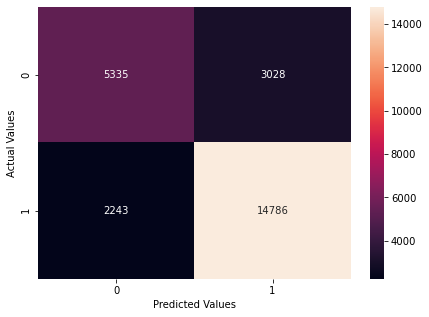

In [101]:
cm = confusion_matrix(y_train, pred_train13)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

**We decreased the conflicts within the model by deleting misleading variables.  The model also improves accuracy, when comparing to the original confusion matrix constructed.** 

In [102]:
# evaluate the accuracy
print("Accuracy on training set : ", accuracy_score(y_train, pred_train13))

Accuracy on training set :  0.7924149338374291


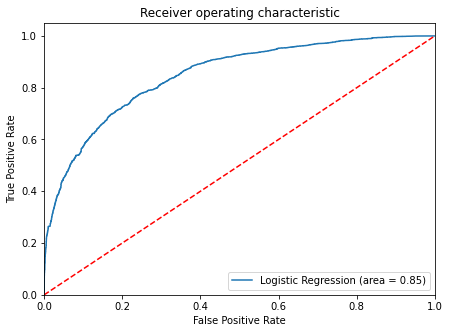

In [103]:
logit_roc_auc_train = roc_auc_score(y_train, lg13.predict(X_train13))
fpr, tpr, thresholds = roc_curve(y_train, lg13.predict(X_train13))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**The model is performing well on the training set, given the area under the curve as well as the shape.**

In [104]:
# dropping variables from test set as well which were dropped from training set
X_test = X_test.drop(["arrival_year", "market_segment_type_Online", "no_of_adults", "no_of_weekend_nights", "type_of_meal_plan_Meal Plan 3", "market_segment_type_Complementary", "room_type_reserved_Room_Type 3", "room_type_reserved_Room_Type 7", "room_type_reserved_Room_Type 6", "no_of_previous_bookings_not_canceled", "room_type_reserved_Room_Type 4", "type_of_meal_plan_Not Selected", "room_type_reserved_Room_Type 5"], axis=1)

In [105]:
pred_test = lg13.predict(X_test) > 0.5
pred_test = np.round(pred_test)

In [106]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train13))
print("Accuracy on test set : ", accuracy_score(y_test, pred_test))

Accuracy on training set :  0.7924149338374291
Accuracy on test set :  0.7974823118625379


**The training set are close together in value and predict almost 80% of the data, which means they are performing very well under this machine learning logistic regression model.**

## Building a Decision Tree

In [107]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(25392, 27) (10883, 27)


In [108]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [109]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  0.994210775047259
Accuracy on test set :  0.8696131581365433


In [110]:
#Checking number of bookings that were not cancelled
y.sum(axis = 0)

24390

**Accuracy is not a good indicator here since the majority of bookings were not cancelled.** 

**Since we don't want people to cancel their bookings we should use Recall as a metric of model evaluation instead of accuracy.**
* Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

In [111]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    
    # the rest of the code pretties up the graph 
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [112]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

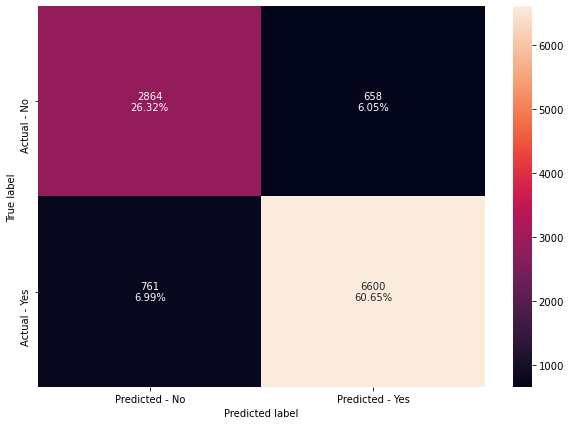

In [113]:
make_confusion_matrix(dTree,y_test)

**2864 guests cancelled their booking when predicted 
6600 guests did not cancel their booking when predicted that they would not cancel their bookings** 

In [115]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  0.9957719184919842
Recall on test set :  0.8966173074310556


## Do we need to prune the tree?

In [116]:
feature_names = list(X.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


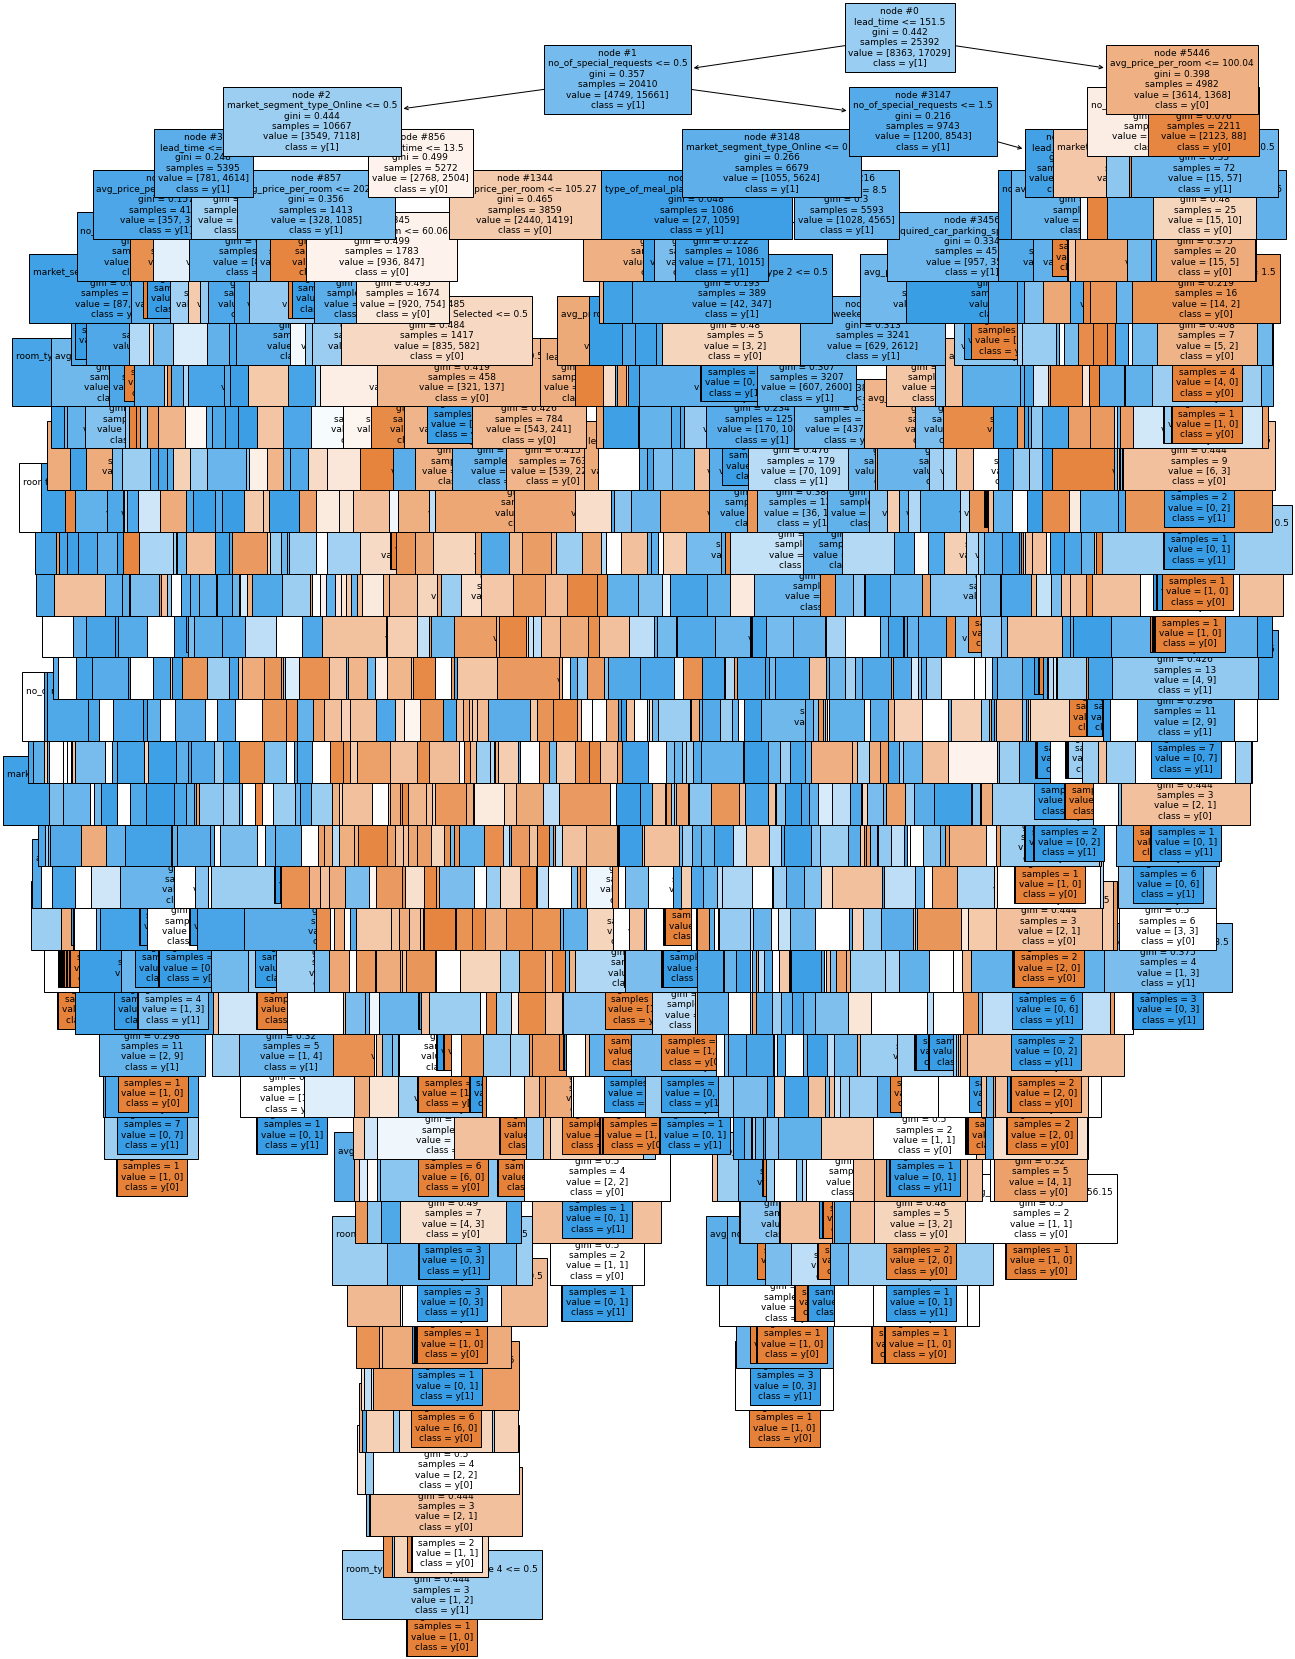

In [117]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()



In [118]:
# calculating the importance of features
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.350353
avg_price_per_room                    0.177265
market_segment_type_Online            0.092345
arrival_date                          0.085259
no_of_special_requests                0.067948
arrival_month                         0.064570
no_of_week_nights                     0.045395
no_of_weekend_nights                  0.038528
no_of_adults                          0.027482
arrival_year                          0.011793
type_of_meal_plan_Not Selected        0.008234
room_type_reserved_Room_Type 4        0.006904
required_car_parking_space            0.006878
market_segment_type_Offline           0.003927
type_of_meal_plan_Meal Plan 2         0.003704
no_of_children                        0.003672
room_type_reserved_Room_Type 5        0.001681
room_type_reserved_Room_Type 2        0.001486
market_segment_type_Corporate         0.000646
repeated_guest                        0.000601
room_type_res

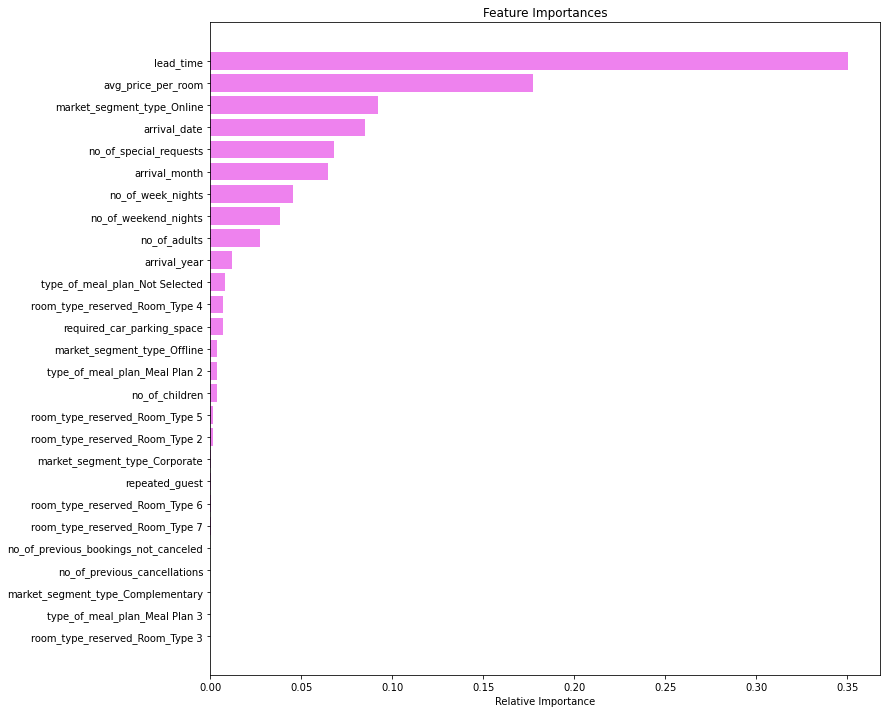

In [119]:
# taking same tree and plotting it 

importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [120]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

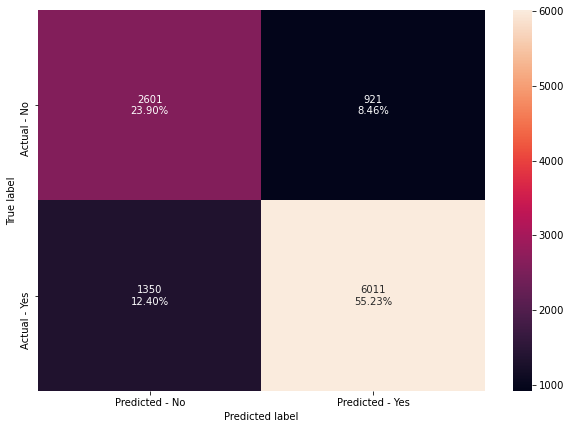

In [121]:
make_confusion_matrix(dTree1, y_test)

In [122]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.7844202898550725
Accuracy on test set :  0.7913259211614444
Recall on training set :  0.8103822890363498
Recall on test set :  0.8166010052981931


**Recall on training set has reduced from 1 to 0.81 but this is an improvement because now the model is not overfitting and we have a generalized model.**

### Visualizing the Decision Tree

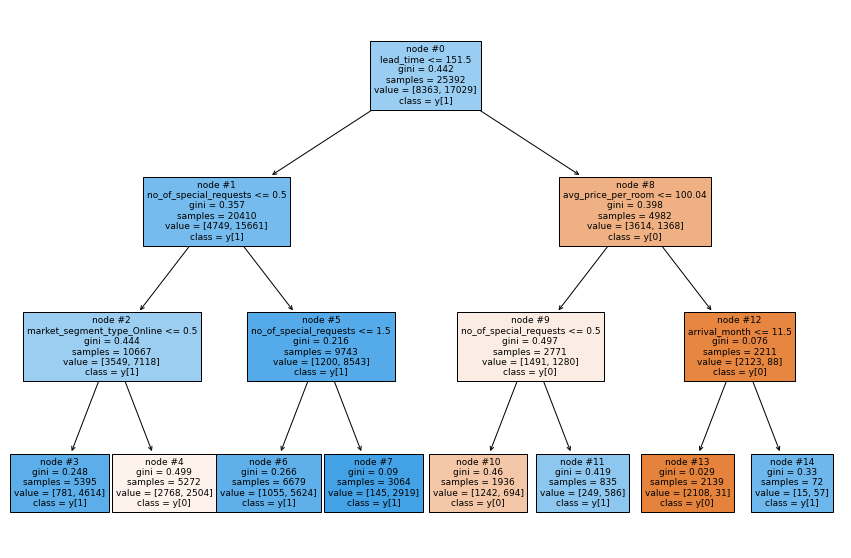

In [123]:
# 3 splits only 

plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [124]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [781.00, 4614.00] class: 1
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [2768.00, 2504.00] class: 0
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- weights: [1055.00, 5624.00] class: 1
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- weights: [145.00, 2919.00] class: 1
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- no_of_special_requests <= 0.50
|   |   |   |--- weights: [1242.00, 694.00] class: 0
|   |   |--- no_of_special_requests >  0.50
|   |   |   |--- weights: [249.00, 586.00] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- arrival_month <= 11.50
|   |   |   |--- weights: [2108.00, 31.00] class: 0
|   |   |--- arrival_month >  11.50
|   |   |   |--- weights: [15.00, 57.00] class: 1



In [125]:
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.501907
market_segment_type_Online            0.199054
no_of_special_requests                0.164194
avg_price_per_room                    0.113125
arrival_month                         0.021719
no_of_week_nights                     0.000000
type_of_meal_plan_Not Selected        0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 2        0.000000
type_of_meal_plan_Meal Plan 3         0.000000
required_car_parking_space            0.000000
type_of_meal_plan_Meal Plan 2         0.000000
no_of_children                        0.000000
no_of_previou

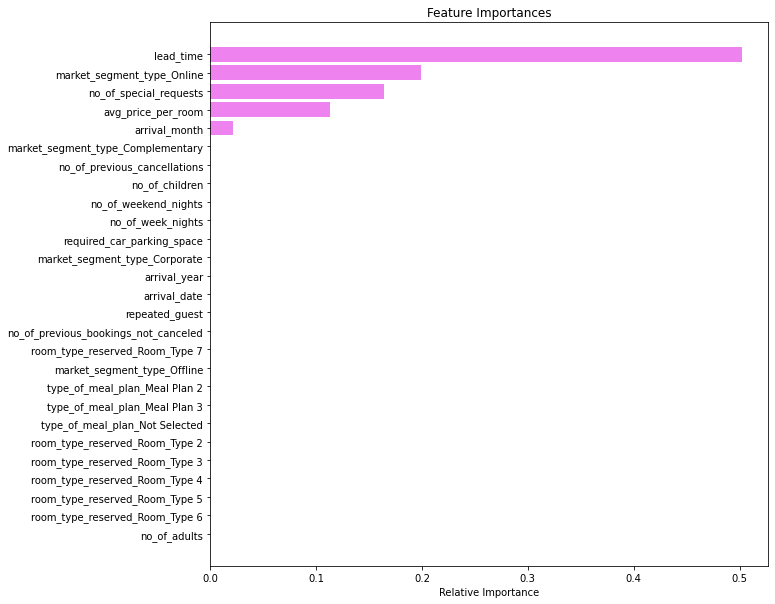

In [126]:
# only a few features listed because there are only 3 splits 

importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* You can see in important features of previous model, average price per room was above market segment Online, market segment Online is above the average price per room. 
  this is the shortcoming of pre pruning, we just limit it even before knowing the importance of features and split.

* That's why we will go for pre pruning using grid search, maybe setting max_depth to 3 is not good enough
* It is bad to have a very low depth because the model is underfit

### Using GridSearch for Hyperparameter tuning of our tree model

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article

# try different values for each of these parameters 
# to find the best fit 
# hyperparameter tuning must be done carefully 

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search

# cross validation of 5 sets 

grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 

# specific decision trees based on the defined estimator

estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2, min_impurity_decrease=0.1,
                       random_state=1)

### Confusion Matrix - decision tree with tuned hyperparameters

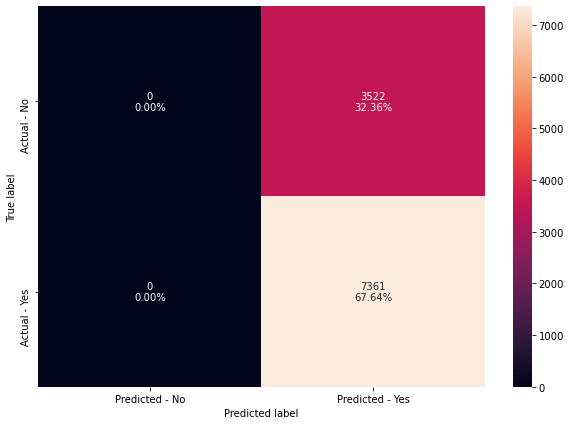

In [129]:
make_confusion_matrix(estimator,y_test)

In [130]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.6706442974165091
Accuracy on test set :  0.6763759992649085
Recall on training set :  1.0
Recall on test set :  1.0


**Testing performs slightly better than the training set!** 

### Visualizing the Decision Tree

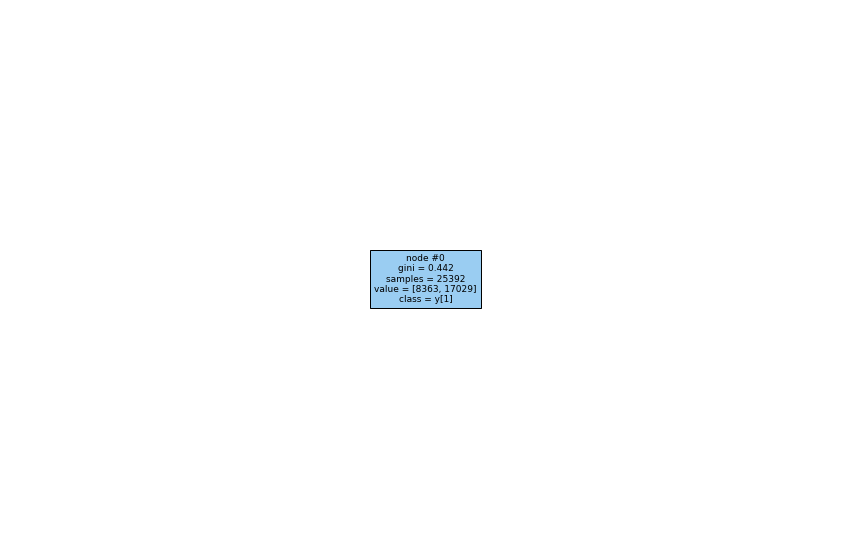

In [131]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [132]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- weights: [8363.00, 17029.00] class: 1



In [133]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                      Imp
no_of_adults                          0.0
type_of_meal_plan_Meal Plan 2         0.0
market_segment_type_Offline           0.0
market_segment_type_Corporate         0.0
market_segment_type_Complementary     0.0
room_type_reserved_Room_Type 7        0.0
room_type_reserved_Room_Type 6        0.0
room_type_reserved_Room_Type 5        0.0
room_type_reserved_Room_Type 4        0.0
room_type_reserved_Room_Type 3        0.0
room_type_reserved_Room_Type 2        0.0
type_of_meal_plan_Not Selected        0.0
type_of_meal_plan_Meal Plan 3         0.0
no_of_special_requests                0.0
no_of_children                        0.0
avg_price_per_room                    0.0
no_of_previous_bookings_not_canceled  0.0
no_of_previous_cancellations          0.0
repeated_guest                        0.0
arrival_date                          0.0
arrival_month                         0.0
arrival_year                          0.0
lead_time                         

**Here we see that the importance of features have all decreased to zero.  This model is severely underfit.** 

### Cost Complexity Pruning

### Total impurity of leaves vs effective alphas of pruned tree

In [134]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [135]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.007572
1     4.327745e-07    0.007573
2     4.688391e-07    0.007573
3     5.329960e-07    0.007574
4     6.133547e-07    0.007575
...            ...         ...
1340  6.665684e-03    0.286897
1341  1.304480e-02    0.299942
1342  1.725993e-02    0.317202
1343  2.399048e-02    0.365183
1344  7.657789e-02    0.441761

[1345 rows x 2 columns]

**This has 1345 trees.** 

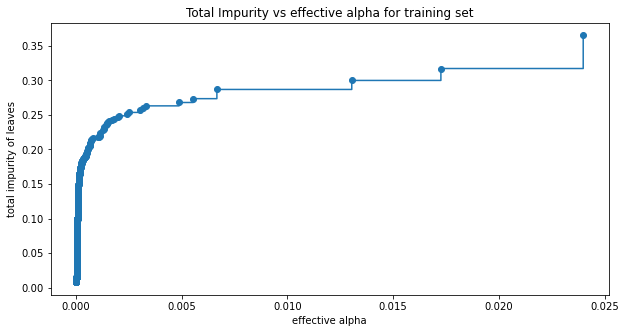

In [136]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [137]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07657789477371368


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

Text(0.5, 1.0, 'Depth vs alpha')

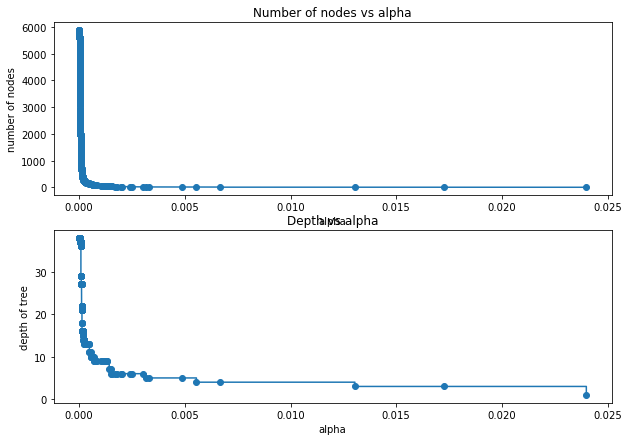

In [138]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")

**As alpha changes the tree becomes simpler and depth decreases.**

### Accuracy vs alpha for training and testing sets

In [139]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

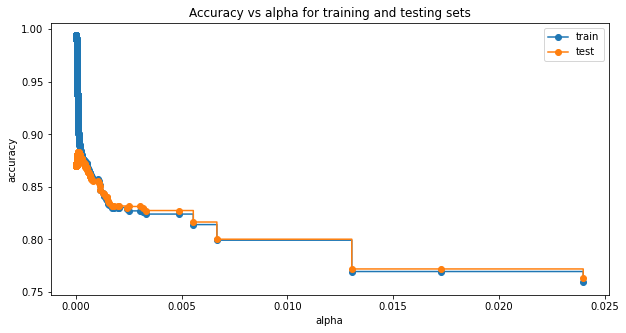

In [140]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Train and test are both good fit, even though test doesn't reach the full 1.00 accuracy point.** 

In [141]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.00011736595788977046, random_state=1)
Training accuracy of best model:  0.9029615626969124
Test accuracy of best model:  0.883304235964348


#### Since accuracy isn't the right metric for our data we would want high recall

In [142]:
# find best in terms of recall 

recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [143]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [144]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

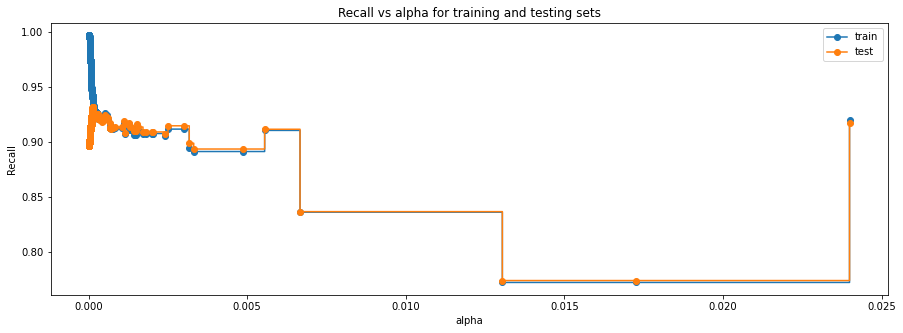

In [145]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()

In [146]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012717831407730315, random_state=1)


### Confusion Matrix - post-pruned decision tree

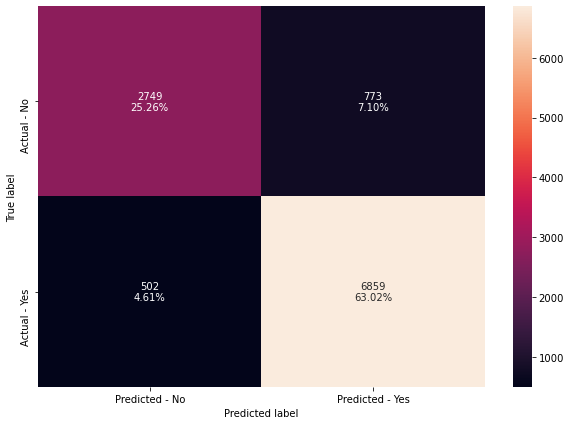

In [147]:
make_confusion_matrix(best_model,y_test)

In [148]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.9417464325562276
Recall on test set :  0.9318027441923652


**With post-pruning we get the highest recall on the test set and closest values of train to test set.** 

### Visualizing the Decision Tree

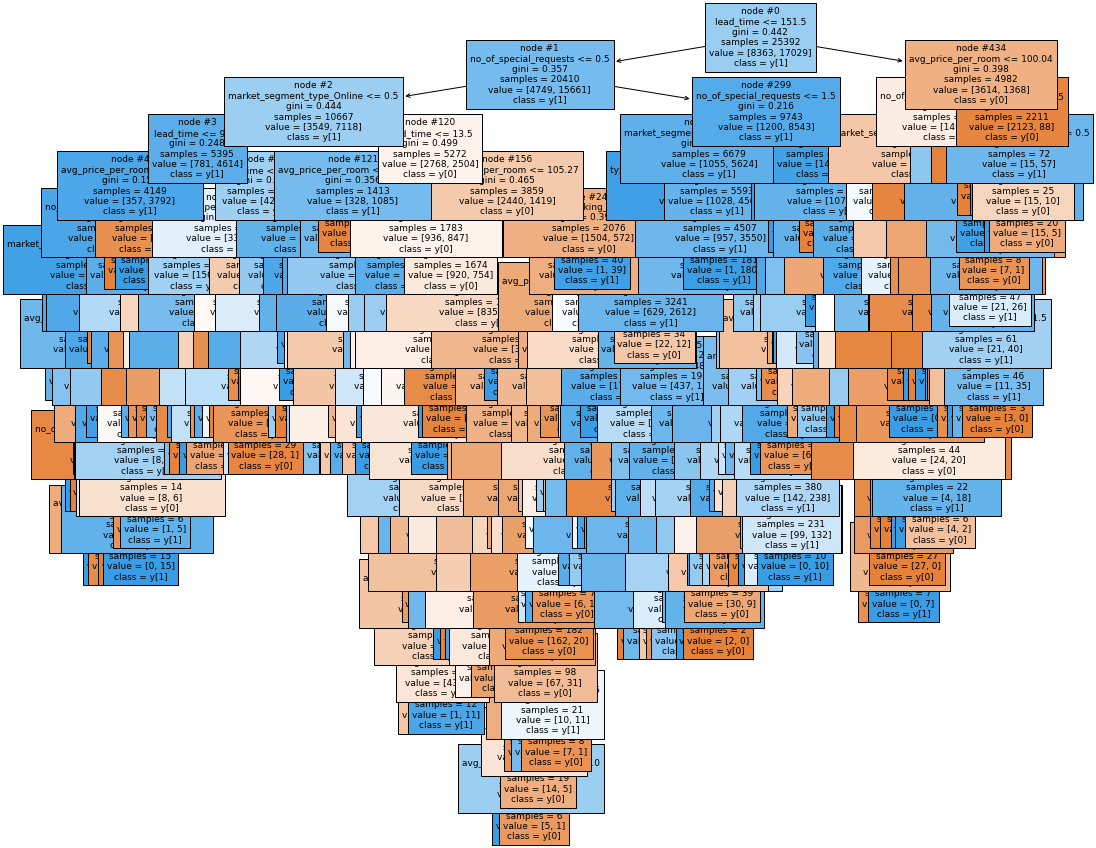

In [149]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [150]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- weights: [43.00, 558.00] class: 1
|   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 135.00
|   |   |   |   |   |   |   |   |   |--- weights: [36.00, 162.00] class: 1
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  135.00
|   |   |   |   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1609.00] class: 1
|   |   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |   |--- lead_time <= 

In [151]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.402838
avg_price_per_room                    0.155707
market_segment_type_Online            0.138645
no_of_special_requests                0.100398
arrival_month                         0.056324
arrival_date                          0.034973
no_of_weekend_nights                  0.031197
no_of_adults                          0.023968
no_of_week_nights                     0.017755
arrival_year                          0.014170
required_car_parking_space            0.010020
market_segment_type_Offline           0.005098
type_of_meal_plan_Not Selected        0.002692
type_of_meal_plan_Meal Plan 2         0.002174
room_type_reserved_Room_Type 4        0.001874
room_type_reserved_Room_Type 5        0.001078
room_type_reserved_Room_Type 2        0.000613
no_of_children                        0.000475
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
repeated_gues

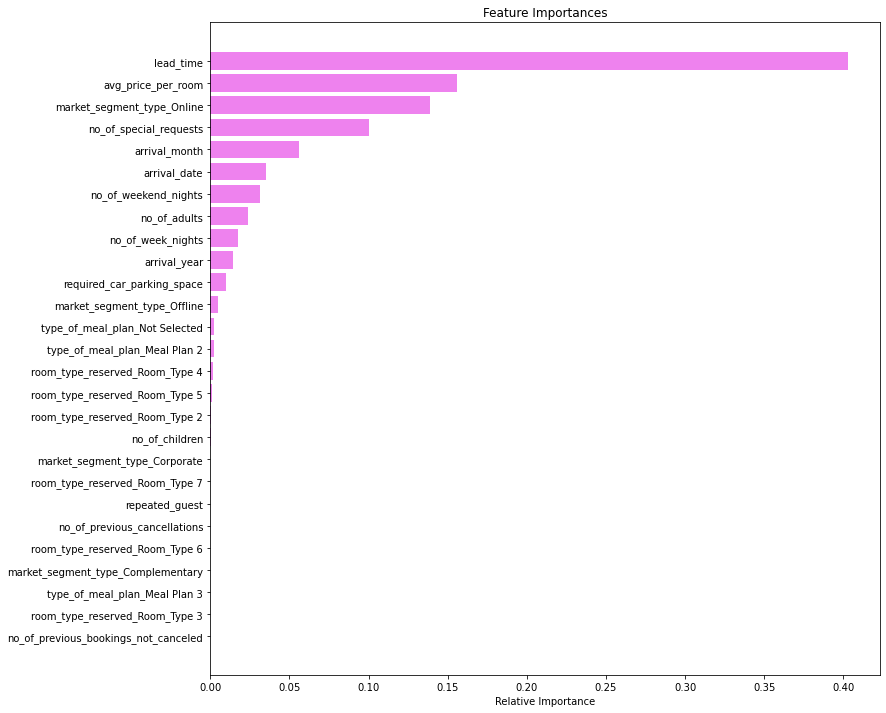

In [152]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model Performance Comparison and Conclusions

In [153]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[0.99,0.81,1,0.94], 'Test_Recall':[0.89,0.81,1,0.93]}) 
comparison_frame

Model  Train_Recall  Test_Recall
0                  Initial decision tree model          0.99         0.89
1  Decision tree with restricted maximum depth          0.81         0.81
2    Decision treee with hyperparameter tuning          1.00         1.00
3              Decision tree with post-pruning          0.94         0.93

**Although the decision tree with the highest recall is the decision tree with hyperparameter tuning, this tree only has one node to the entire tree and doesn't represent the data.  
The tree with the highest test recall value, besides the tree with hyperparameter tuning, is the decision tree with post-pruning.  This is the best model of the decision trees.**  

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

* Important features from the best decision tree model are lead time, average price per room, Online market segment type, number of special requests, arrival month, arrival date, number of weekend nights, number of adults, number of week nights, arrival year, required car parking space, Offline market segment type, etc., respectfully. 
* Important features from the linear regression model, when looking at the odds, are required parking space, repeated guests, number of special requests, and offline market segment type - there is a 384.25%, 2318.43%,  334.55%, and 815.04% chance that these guests fitting in the respected categories will not cancel their bookings.  
* In order to cater more to some of these guests, hotels could pay for ads in magizines and for social media presence from influencers and companies which are affiliated with car rental companies, weddings and anniversary advertisement accounts and magazines, etc.  It makes sense to give these guests upgrades and incentives for special experiences when booking with the hotel.  If they have a great experience, they could potentially fit into the repeat guests category in the future which also contributes to a large percentage of the guests which do not cancel their bookings. 
* Since the offline market segment also contributes to one of the highest groups which tends to not cancel their bookings, maybe an in person presence would be worth while such as setting up booths in malls or high traffic areas before special holidays to give customers an opportunity to book with one of the employees directly.  The target area would be particularly important, considering the guests without children are more likely to not cancel their booking. 
* Overall, these two models contribute to a large range of knowledge about hotel guests which increase and decrease the probability of their future cancellation.  Offering incentives, anticipating cancellations, and gathering more insightful data about hotel guests are all great ways to capitalize off of data scientists' modeling skills.  Looking at the EDA Inghts for more information about majority of hotel guest populations will also leverage which actionable insights are more worth the investment as well. 